In [1]:
import math
import pandas
import seaborn
import numpy as np
import matplotlib.pyplot as plt

pandas.options.display.max_columns = None
pandas.options.display.max_rows = None
pandas.options.display.max_colwidth = None
seaborn.set(rc={"figure.figsize":(7,7)})

# unneeded columns from csv imports
drop = ["StartDate", "EndDate", "Status", "IPAddress", "Progress", "Duration (in seconds)", "RecordedDate", "ResponseId", "RecipientLastName", "RecipientFirstName", "RecipientEmail", "ExternalReference", "LocationLatitude", "LocationLongitude", "DistributionChannel"]

# hustle pre program survey (120 responses)
pre_hustle = pandas.read_csv("csv/pre-hustle.csv")
pre_hustle = pre_hustle.drop(columns=drop) # removing unneeded columns listed above
pre_hustle = pre_hustle.drop(0) # removing unneeded second row of import IDs
pre_hustle = pre_hustle.drop(1) # removing unneeded first row of questions

# hustle post program survey (68 responses)
post_hustle = pandas.read_csv("csv/post-hustle.csv")
post_hustle = post_hustle.drop(columns=drop)
post_hustle = post_hustle.drop(0)
post_hustle = post_hustle.drop(1)

# build pre program survey (57 responses)
pre_build = pandas.read_csv("csv/pre-build.csv")
pre_build = pre_build.drop(columns=drop)
pre_build = pre_build.drop(0)
pre_build = pre_build.drop(1)

# build post program survey (36 responses)
post_build = pandas.read_csv("csv/post-build.csv")
post_build = post_build.drop(columns=drop)
post_build = post_build.drop(0)
post_build = post_build.drop(1)

# Defining helper functions to reduce code repetition  -- I acknowledge that I could optimize this code by creating functions or even a class to handle the data eval, possible v2

def Q30(df):
    
    valid = 0
    pursue = 0
    cert = 0
    camp = 0
    asso = 0
    ba = 0
    beyond = 0

    for index, row in df.iterrows():

        if isinstance(row["Q30"], str): # checking for valid responses to the prompt (ones that aren't missing or invalid)
            valid += 1

        if "Career in technology (or in the tech industry in general)" in str(row["Q30"]):
            pursue += 1
        elif "Technology- or software-related certification" in str(row["Q30"]):
            cert += 1
        elif "Tech bootcamp" in str(row["Q30"]):
            camp += 1
        elif "Associate's Degree" in str(row["Q30"]):
            asso += 1
        elif "Bachelor's degree" in str(row["Q30"]):
            ba += 1
        elif "Beyond bachelor's degree (such as master's, Ph.D, or other graduate-level)" in str(row["Q30"]):
            beyond += 1

    return valid, pursue, cert, camp, asso, ba, beyond

def get_responses(df, column):
    
    results = {
        "valid": 0,
        "di": 0,
        "sd": 0,
        "n": 0,
        "sa": 0,
        "ag": 0
    }
    
    results_2 = {
        "valid": 0,
        "n": 0,
        "r": 0,
        "s": 0,
        "v": 0,
        "a": 0
    }
    
    results_3 = {
        "valid": 0,
        "n": 0,
        "s": 0,
        "f": 0,
        "v": 0
    }
    
    if "Programming" in column:
        
        for index, row in df.iterrows():

            if isinstance(row[column], str): 
                results_2["valid"] += 1

            if row[column] == "Never":
                results_2["n"] += 1
            elif row[column] == "Rarely":
                results_2["r"] += 1
            elif row[column] == "Sometimes":
                results_2["s"] += 1
            elif row[column] == "Very often":
                results_2["v"] += 1
            elif row[column] == "Always":
                results_2["a"] += 1
                
        return results_2
    
    elif "Python" in column:
        
        for index, row in df.iterrows():

            if isinstance(row[column], str): 
                results_3["valid"] += 1

            if row[column] == "Not confident at all":
                results_3["n"] += 1
            elif row[column] == "Slightly confident":
                results_3["s"] += 1
            elif row[column] == "Fairly confident":
                results_3["f"] += 1
            elif row[column] == "Very confident":
                results_3["v"] += 1
    
        return results_3
    
    else:
        
        for index, row in df.iterrows():

            if isinstance(row[column], str): 
                results["valid"] += 1

            if row[column] == "Strongly disagree":
                results["di"] += 1
            elif row[column] == "Somewhat disagree":
                results["sd"] += 1
            elif row[column] == "Neutral":
                results["n"] += 1
            elif row[column] == "Somewhat agree":
                results["sa"] += 1
            elif row[column] == "Strongly agree":
                results["ag"] += 1
            
        return results

def multi_response(df, columns):
    
    results = {}
    
    for col in columns:
        results[col] = get_responses(df, col)
        
    return results

def total_multi(obj):
    
    results = {
        "valid": 0,
        "pos": 0,
        "pos_with_n": 0
    }

    for key in obj:

        results["valid"] += obj[key]["valid"]

        if "di" in list(obj[key].keys()):

            results["pos"] += obj[key]["sa"] + obj[key]["ag"]
            results["pos_with_n"] += obj[key]["n"]

        elif "r" in list(obj[key].keys()):

            results["pos"] += obj[key]["s"] + obj[key]["v"] + obj[key]["a"]

        else:

            results["pos"] += obj[key]["s"] + obj[key]["f"] + obj[key]["v"]

    results["pos_with_n"] += results["pos"]

    return results

def get_demos(df, program):
    
    results = {
        "male": 0,
        "female": 0,
        "transgender": 0,
        "Asian": 0,
        "Latinx": 0,
        "African-American": 0,
        "Native-American": 0,
        "Indian-American": 0,
        "Indigenous": 0,
        "Haitian": 0
    }
    
    male = ["male", "man", "boy", "latino", "chicano"]
    fem = ["female", "woman", "girl", "latina", "chicana"]
    trans = ["transgender", "trans"]
    asian = ["asian", "chinese", "cambodian", "asia", "laotian", "vietnamese", "pacific", "filipino"]
    latinx = ["latinx", "latino", "latina", "mexican", "chicano", "chicana", "hispanic"]
    afro = ["african", "black"]
    nat = ["native", "meso"]
    ind = ["indian", "sikh"]
    
    demos = df.astype(str).values.tolist()
    
    for row in demos:
        
        demo1 = [word.lower() for word in row[0].replace('/', ' ').replace('\n', ' ').replace(',', ' ').replace('.', '').replace('-', ' ').split()]
        demo2 = [word.lower() for word in row[1].replace('/', ' ').replace('\n', ' ').replace(',', ' ').replace('.', ' ').replace('-', ' ').split()]
        
        if (set(demo1) & set(male)) or (set(demo2) & set(male)):
            results["male"] += 1
        
        if (set(demo1) & set(fem)) or (set(demo2) & set(fem)):
            results["female"] += 1
        
        if (set(demo1) & set(trans)) or (set(demo2) & set(trans)):
            results["transgender"] += 1
            
        if (set(demo1) & set(asian)) or (set(demo2) & set(asian)):
            results["Asian"] += 1
            
        if (set(demo1) & set(latinx)) or (set(demo2) & set(latinx)):
            results["Latinx"] += 1
            
        if (set(demo1) & set(afro)) or (set(demo2) & set(afro)):
            results["African-American"] += 1
            
        if (set(demo1) & set(nat)) or (set(demo2) & set(nat)):
            results["Native-American"] += 1
            
        if (set(demo1) & set(ind)) or (set(demo2) & set(ind)):
            results["Indian-American"] += 1

        if ("indigenous" in demo1) or ("indigenous" in demo2):
            results["Indigenous"] += 1
            
        if ("haitian" in demo1) or ("haitian" in demo2):
            results["Haitian"] += 1
        
    if "hustle" == program.lower():
        
        '''
        These amendments to the results are due to learners responding but not giving actual demographics
        Proper demographics were attained from their program application
        
        Ricardo Munoz Del Toro (latino)
        Melvin Gomez-Ordaz (latino)
        Douglas L. Bradley (black male)
        Orion McNealey (black male)
        Dorothy Morgan (asian female)
        Thuy-Lyz Dinh (female)
        DanuhShai Frank (male)
        AA - 1 (Jonathan Lee change from black to Haitian)
        '''
        
        results["male"] += 6
        results["female"] += 2
        results["Latinx"] += 2
        results["African-American"] += 1
        results["Asian"] += 1
        
        return results
        
    if "build" == program.lower():
        
        '''
        These amendments to the results are due to learners responding but not giving actual demographics
        Proper demographics were attained from their program application
        
        Moses Rivera (latino)
        Orlando Martinez (latino)
        Anurup Paudel (asian male)
        Halima Aktar (asian female)
        Walter Menjivar (latino)
        Twisha Thote (asian female)
        George Kong (asian male)
        Lorenzo Reyes (asian male)
        Rahima Lynne Acosta (asian female)
        Gordon Zhen (asian male)
        Zarlo Diaz (latino)
        Timothy Kariithi (black male)
        '''
        
        results["male"] += 9
        results["female"] += 3
        results["Latinx"] += 4
        results["African-American"] += 1
        results["Asian"] += 7
        
    return results

To start I am calculating the total number of core program graduates. This is being based off of the students who have been marked as completed in the following spreadsheets:

[HUSTLE](https://docs.google.com/spreadsheets/d/1xEMc-UL85G_D6_PkcEhm8FwycgF0BhnpK28UM95C92s/edit#gid=0) \
[BUILD](https://docs.google.com/spreadsheets/d/1mRbmRMKnoTsRIzQFM4mF-t3S1NnJpfuDbXnjp2y1YOU/edit#gid=0)

In [2]:
hustle_complete = 64
build_complete = 40
total_graduates = 104

In relation to the number of program graduates, we will now address our program retention rates. We will do this by comparing the number of completions to the number of accepted learners as according to the spreadsheets linked above.

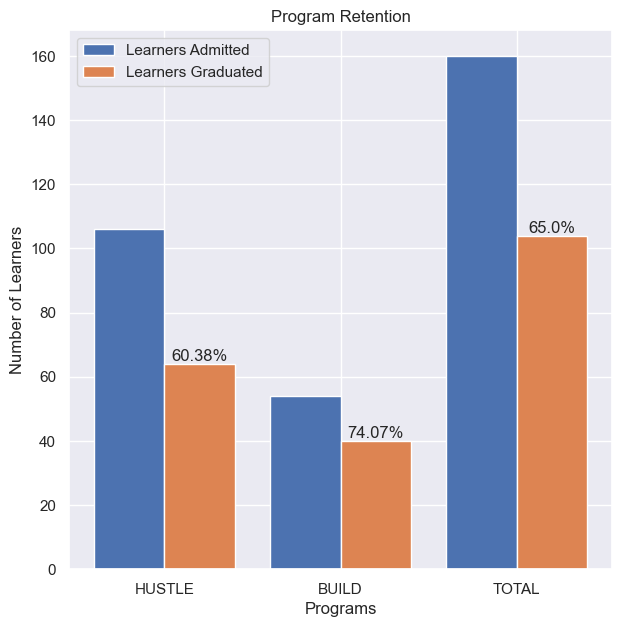

In [3]:
hustle_admissions = 106
build_admissions = 54

overall_retention = 104 / 160
hustle_retention = 64 / 106
build_retention = 40 / 54

# creating visual for retention data
X = ['HUSTLE','BUILD','TOTAL']
admit = [106,54,160]
complete = [64,40,104]
  
X_axis = np.arange(len(X))
  
fig = plt.bar(X_axis - 0.2, admit, 0.4, label = 'Learners Admitted')
fig = plt.bar(X_axis + 0.2, complete, 0.4, label = 'Learners Graduated')
  
plt.xticks(X_axis, X)
plt.xlabel("Programs")
plt.ylabel("Number of Learners")
plt.title("Program Retention")
plt.bar_label(fig, ["{}%".format(round(hustle_retention*100, 2)), "{}%".format(round(build_retention*100, 2)), "{}%".format(round(overall_retention*100, 2))])
plt.legend()
# plt.savefig('images/program_retention.png')
plt.show()

<b>104 total program graduates, 64 HUSTLE program graduates, 40 BUILD graduates 

<b>160 total program admissions, 106 HUSTLE program admissions, 54 BUILD program admissions 

<b>65% overall retention, 60.4% HUSTLE retention, 74.1% BUILD retention

In [4]:
hustle_demos = get_demos(post_hustle[["Crenshaw", "Crenshaw.1"]], "hustle")
hustle_demos

{'male': 25,
 'female': 18,
 'transgender': 1,
 'Asian': 14,
 'Latinx': 17,
 'African-American': 6,
 'Native-American': 2,
 'Indian-American': 2,
 'Indigenous': 2,
 'Haitian': 1}

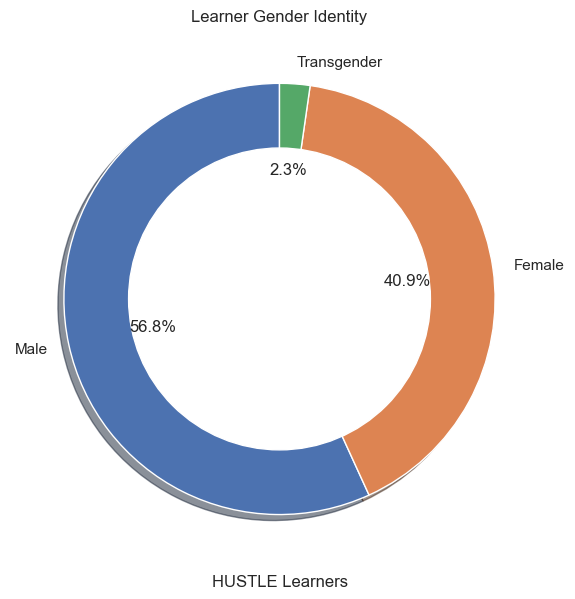

In [5]:
# create data

labels = ["Male", "Female", "Transgender"]

total = hustle_demos["male"] + hustle_demos["female"] + hustle_demos["transgender"]

per = (hustle_demos["male"]/total) * 100
per2 = (hustle_demos["female"]/total) * 100
per3 = 100 - per - per2
                                                                     
size_of_groups = [per, per2, per3]

# Create a pieplot
plt.pie(size_of_groups, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.xlabel("HUSTLE Learners")
plt.title("Learner Gender Identity")
# plt.savefig('images/h_genid_donut.png')
plt.show()

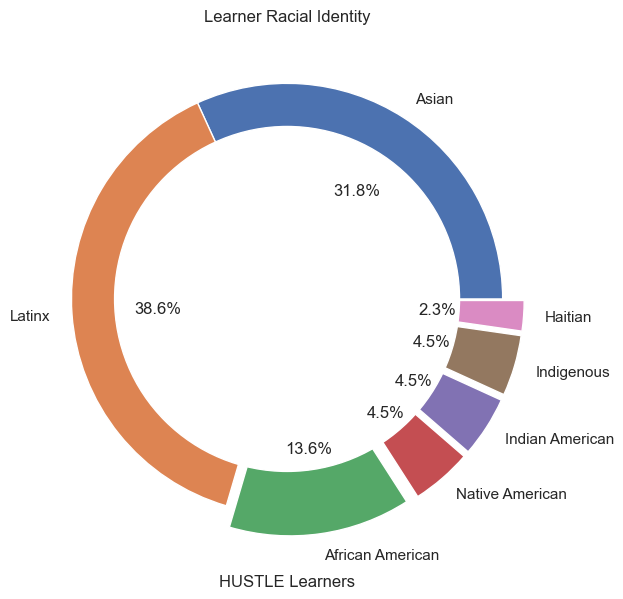

In [6]:
# create data

labels = ["Asian", "Latinx", "African American", "Native American", "Indian American", "Indigenous", "Haitian"]

total = hustle_demos["male"] + hustle_demos["female"] + hustle_demos["transgender"]

per = (hustle_demos["Asian"]/total) * 100
per2 = (hustle_demos["Latinx"]/total) * 100
per3 = (hustle_demos["African-American"]/total) * 100
per4 = (hustle_demos["Native-American"]/total) * 100
per5 = (hustle_demos["Indian-American"]/total) * 100
per6 = (hustle_demos["Indigenous"]/total) * 100
per7 = 100 - per - per2 - per3 - per4 - per5 - per6
                                                                     
size_of_groups = [per, per2, per3, per4, per5, per6, per7]
explode = (0, 0, 0.1, 0.1, 0.1, 0.1, 0.1) 

# Create a pieplot
plt.pie(size_of_groups, labels = labels, explode = explode, autopct='%1.1f%%', shadow=False, startangle=0)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.8, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.xlabel("HUSTLE Learners")
plt.title("Learner Racial Identity")
# plt.savefig('images/h_race_donut.png')
plt.show()

In [7]:
build_demos = get_demos(post_build[["Crenshaw", "Crenshaw.1"]], "build")
build_demos

{'male': 15,
 'female': 12,
 'transgender': 0,
 'Asian': 17,
 'Latinx': 9,
 'African-American': 1,
 'Native-American': 0,
 'Indian-American': 0,
 'Indigenous': 0,
 'Haitian': 0}

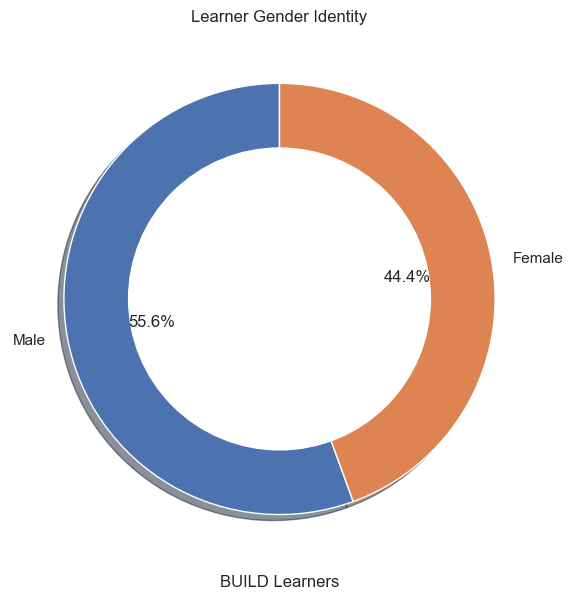

In [8]:
# create data

labels = ['Male','Female']

total = build_demos["male"] + build_demos["female"]

per = (build_demos["male"]/total) * 100
per2 = (build_demos["female"]/total) * 100
                                                                     
size_of_groups = [per, per2]

# Create a pieplot
plt.pie(size_of_groups, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.xlabel("BUILD Learners")
plt.title("Learner Gender Identity")
# plt.savefig('images/b_genid_donut.png')
plt.show()

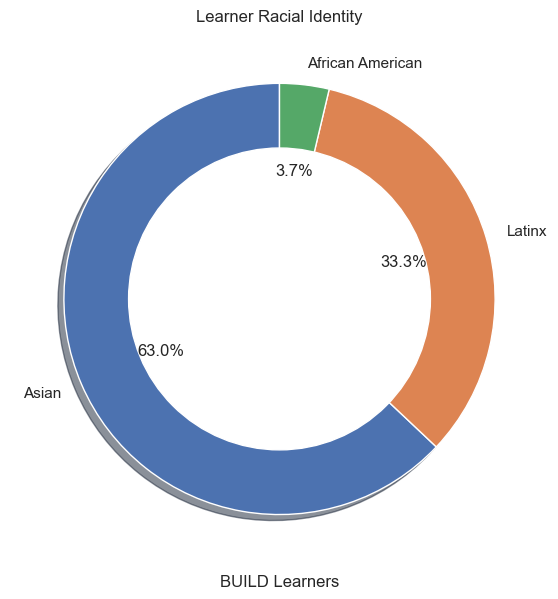

In [9]:
# create data

labels = ["Asian", "Latinx", "African American"]

total = build_demos["male"] + build_demos["female"]

per = (build_demos["Asian"]/total) * 100
per2 = (build_demos["Latinx"]/total) * 100
per3 = 100 - per - per2
                                                                     
size_of_groups = [per, per2, per3]

# Create a pieplot
plt.pie(size_of_groups, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.xlabel("BUILD Learners")
plt.title("Learner Racial Identity")
# plt.savefig('images/b_race_donut.png')
plt.show()

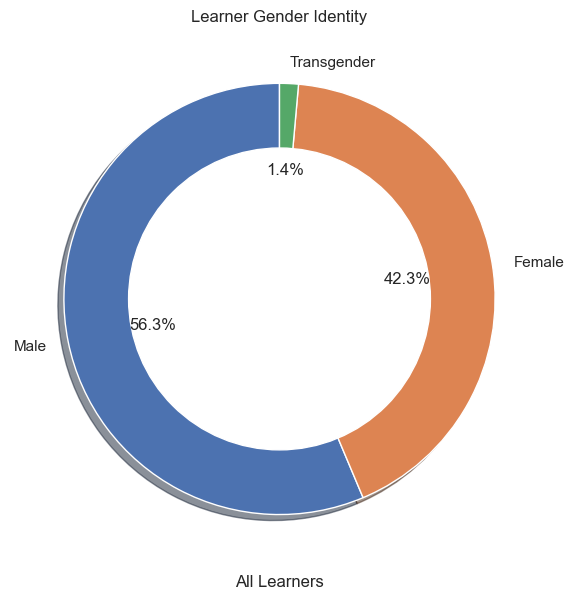

In [10]:
# create data

labels = ["Male", "Female", "Transgender"]

total = hustle_demos["male"] + hustle_demos["female"] + hustle_demos["transgender"] + build_demos["male"] + build_demos["female"]

per = ((hustle_demos["male"] + build_demos["male"])/total) * 100
per2 = ((hustle_demos["female"] + build_demos["female"])/total) * 100
per3 = 100 - per - per2
                                                                     
size_of_groups = [per, per2, per3]

# Create a pieplot
plt.pie(size_of_groups, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.xlabel("All Learners")
plt.title("Learner Gender Identity")
# plt.savefig('images/genid_donut.png')
plt.show()

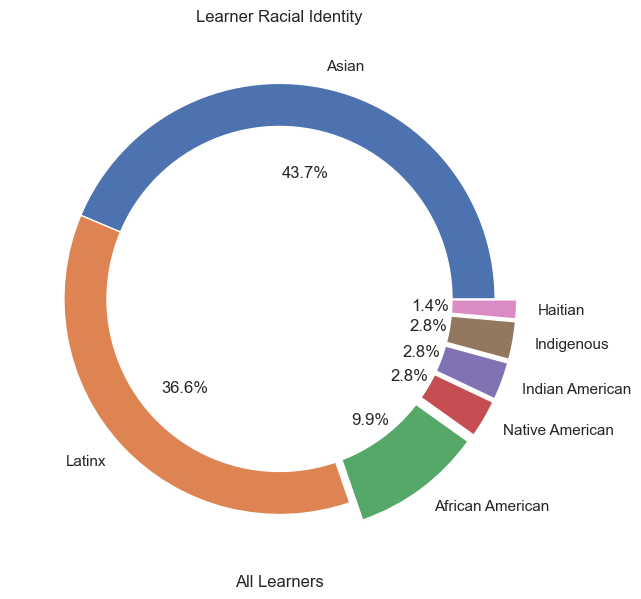

In [11]:
# create data

labels = ["Asian", "Latinx", "African American", "Native American", "Indian American", "Indigenous", "Haitian"]

total = hustle_demos["male"] + hustle_demos["female"] + hustle_demos["transgender"] + build_demos["male"] + build_demos["female"]

per = ((hustle_demos["Asian"] + build_demos["Asian"])/total) * 100
per2 = ((hustle_demos["Latinx"] + build_demos["Latinx"])/total) * 100
per3 = ((hustle_demos["African-American"] + build_demos["African-American"])/total) * 100
per4 = (hustle_demos["Native-American"]/total) * 100
per5 = (hustle_demos["Indian-American"]/total) * 100
per6 = (hustle_demos["Indigenous"]/total) * 100
per7 = 100 - per - per2 - per3 - per4 - per5 - per6
                                                                     
size_of_groups = [per, per2, per3, per4, per5, per6, per7]
explode = (0, 0, 0.1, 0.1, 0.1, 0.1, 0.1) 

# Create a pieplot
plt.pie(size_of_groups, labels = labels, explode = explode, autopct='%1.1f%%', shadow=False, startangle=0)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.8, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.xlabel("All Learners")
plt.title("Learner Racial Identity")
# plt.savefig('images/race_donut.png')
plt.show()

<hr style="border:2px solid black">

<b>First we will be examining all the learners responses to get a sense of our programs' overall impact in various areas.</b> Learners responded to questions which assessed their technical skills, based on their ability to communicate about technology and perform programming via Python. Our questions then assessed their values towards using tech for good, their sense of community within the program, and knowledge gained about career opportunities in tech. Finally, we inquire about their intersectional tech identity, how much they feel like they belong in tech and can be successful in the field. \
\
<b>It is important to note that the number of survey responses differs from the number of verified program graduates. Among those responses, not every survey participant answered every question. \
\
In this evaluation, "positive responses" is referring to the response choices of "Sometimes", "Very often", "Always", "Slightly confident", "Fairly confident", "Very confident", "Somewhat agree", and "Strongly agree".</b>

In [12]:
# combine Communication, Programming & Python

hustle = multi_response(post_hustle, ["QID1_1", "QID1_2", "QID1_3", "QID1_4", "QID1_5", "Programming Skills_1", "Programming Skills_2", "Programming Skills_3", "Python_1", "Python_2", "Python_3"])

hustle_totals = total_multi(hustle)

hustle, hustle_totals

({'QID1_1': {'valid': 52, 'di': 0, 'sd': 5, 'n': 5, 'sa': 26, 'ag': 16},
  'QID1_2': {'valid': 52, 'di': 3, 'sd': 5, 'n': 13, 'sa': 16, 'ag': 15},
  'QID1_3': {'valid': 52, 'di': 0, 'sd': 6, 'n': 12, 'sa': 19, 'ag': 15},
  'QID1_4': {'valid': 52, 'di': 0, 'sd': 1, 'n': 4, 'sa': 11, 'ag': 36},
  'QID1_5': {'valid': 52, 'di': 4, 'sd': 5, 'n': 15, 'sa': 19, 'ag': 9},
  'Programming Skills_1': {'valid': 52,
   'n': 1,
   'r': 1,
   's': 13,
   'v': 24,
   'a': 13},
  'Programming Skills_2': {'valid': 52,
   'n': 3,
   'r': 12,
   's': 16,
   'v': 17,
   'a': 4},
  'Programming Skills_3': {'valid': 52,
   'n': 3,
   'r': 5,
   's': 20,
   'v': 19,
   'a': 5},
  'Python_1': {'valid': 52, 'n': 2, 's': 15, 'f': 26, 'v': 9},
  'Python_2': {'valid': 52, 'n': 1, 's': 16, 'f': 16, 'v': 19},
  'Python_3': {'valid': 52, 'n': 4, 's': 14, 'f': 20, 'v': 14}},
 {'valid': 572, 'pos': 462, 'pos_with_n': 511})

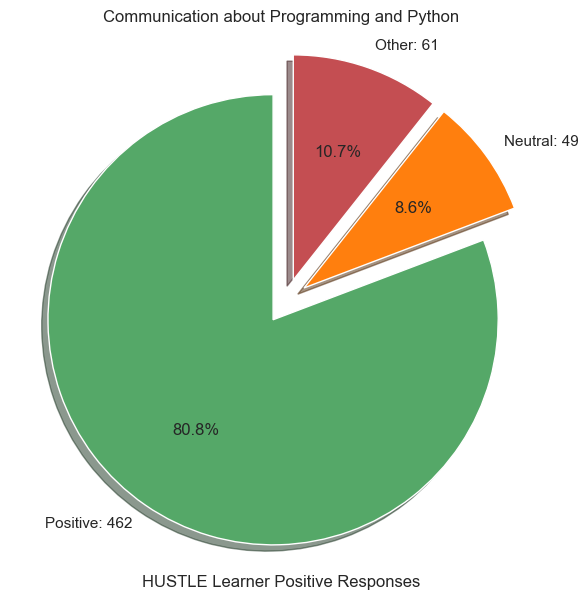

In [13]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(hustle_totals["pos"]), 'Neutral: {}'.format(hustle_totals["pos_with_n"] - hustle_totals["pos"]), 'Other: {}'.format(hustle_totals["valid"] - hustle_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (hustle_totals["pos"] / hustle_totals["valid"]) * 100
per_2 = ((hustle_totals["pos_with_n"] - hustle_totals["pos"])/ hustle_totals["valid"]) * 100
per_3 = ((hustle_totals["valid"] - hustle_totals["pos_with_n"])/ (hustle_totals["valid"])) * 100

size_of_groups = [per, per_2, per_3]
explode = (0.1, 0.1, 0.1)  # this creates space between slices of the pie

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["g", "tab:orange", "r" ], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("HUSTLE Learner Positive Responses")
plt.title("Communication about Programming and Python")
# plt.savefig('images/h_comm_about_tech_pie.png')
plt.show()

<b>For every question in the section of the survey pertaining to Communication about Programming and Python, there was a total of 572 responses given from HUSTLE learners. Of those responses, 511 (89.3%) were positive including neutral responses and 462 (80.8%) were positive not including neutral responses.

In [14]:
build = multi_response(post_build, ["QID1_1", "QID1_2", "QID1_3", "QID1_4", "QID1_5", "Programming Skills_1", "Programming Skills_2", "Programming Skills_3", "Python_1", "Python_2", "Python_3"])

build_totals = total_multi(build)

build, build_totals

({'QID1_1': {'valid': 31, 'di': 2, 'sd': 1, 'n': 6, 'sa': 11, 'ag': 11},
  'QID1_2': {'valid': 31, 'di': 1, 'sd': 6, 'n': 5, 'sa': 11, 'ag': 8},
  'QID1_3': {'valid': 31, 'di': 3, 'sd': 1, 'n': 4, 'sa': 8, 'ag': 15},
  'QID1_4': {'valid': 31, 'di': 3, 'sd': 2, 'n': 1, 'sa': 6, 'ag': 19},
  'QID1_5': {'valid': 31, 'di': 2, 'sd': 3, 'n': 6, 'sa': 13, 'ag': 7},
  'Programming Skills_1': {'valid': 31,
   'n': 0,
   'r': 1,
   's': 11,
   'v': 12,
   'a': 7},
  'Programming Skills_2': {'valid': 31,
   'n': 0,
   'r': 8,
   's': 15,
   'v': 7,
   'a': 1},
  'Programming Skills_3': {'valid': 31,
   'n': 0,
   'r': 2,
   's': 15,
   'v': 7,
   'a': 7},
  'Python_1': {'valid': 31, 'n': 1, 's': 12, 'f': 9, 'v': 9},
  'Python_2': {'valid': 31, 'n': 1, 's': 7, 'f': 13, 'v': 10},
  'Python_3': {'valid': 31, 'n': 3, 's': 6, 'f': 16, 'v': 6}},
 {'valid': 341, 'pos': 279, 'pos_with_n': 301})

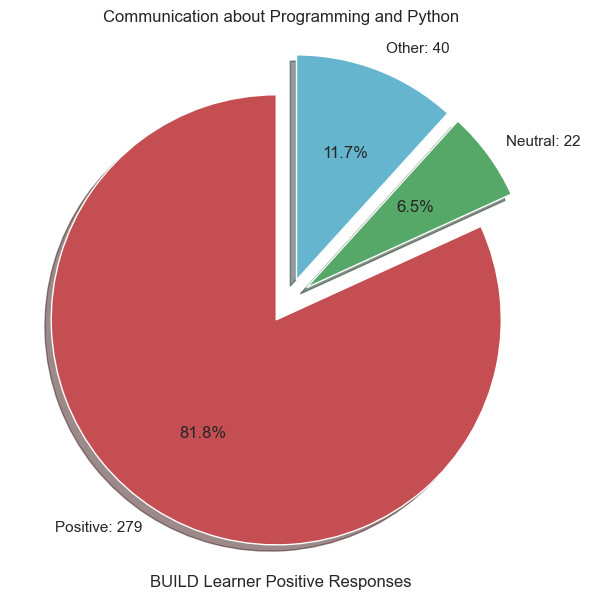

In [15]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(build_totals["pos"]), 'Neutral: {}'.format(build_totals["pos_with_n"] - build_totals["pos"]), 'Other: {}'.format(build_totals["valid"] - build_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (build_totals["pos"] / build_totals["valid"]) * 100
per_2 = ((build_totals["pos_with_n"] - build_totals["pos"])/ build_totals["valid"]) * 100
per_3 = ((build_totals["valid"] - build_totals["pos_with_n"])/ build_totals["valid"]) * 100

size_of_groups = [per, per_2, per_3]
explode = (0.1, 0.1, 0.1)  # this creates space between slices of the pie

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["r", "g", "c" ], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("BUILD Learner Positive Responses")
plt.title("Communication about Programming and Python")
# plt.savefig('images/b_comm_about_tech_pie.png')
plt.show()

<b>For every question in the section of the survey pertaining to Communication about Programming and Python, there was a total of 341 responses given from BUILD learners. Of those responses, 301 (88.3%) of those responses were positive including neutral responses and 279 (81.8%) were positive not including neutral responses.

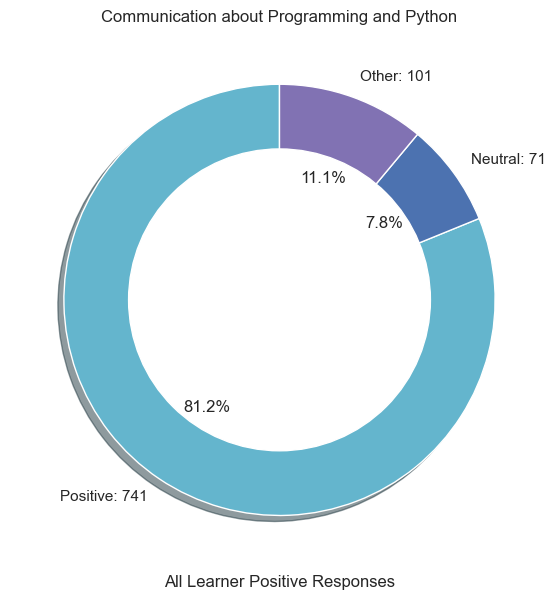

In [16]:
# create data

labels = ['Positive: {}'.format(build_totals["pos"] + hustle_totals["pos"]), 'Neutral: {}'.format((build_totals["pos_with_n"] + hustle_totals["pos_with_n"])-(build_totals["pos"] + hustle_totals["pos"])), 'Other: {}'.format((build_totals["valid"] + hustle_totals["valid"])-(build_totals["pos_with_n"] + hustle_totals["pos_with_n"]))]

per = ((build_totals["pos"] + hustle_totals["pos"]) / (build_totals["valid"] + hustle_totals["valid"])) * 100
per_2 = (((build_totals["pos_with_n"] + hustle_totals["pos_with_n"])-(build_totals["pos"] + hustle_totals["pos"])) / (build_totals["valid"] + hustle_totals["valid"])) * 100
per_3 = 100 - per - per_2

size_of_groups = [per, per_2, per_3]

# Create a pieplot
plt.pie(size_of_groups, colors=["c", "b", "m"], labels = labels, autopct='%1.1f%%', shadow=True, startangle=90)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.xlabel("All Learner Positive Responses")
plt.title("Communication about Programming and Python")
# plt.savefig('images/comm_about_tech_donut.png')
plt.show()

<b>Overall, there were 913 learner responses to the Communication about Programming and Python section of the survey. 812 (88.9%) of those responses were positive including neutral responses and 741 responses (81.2%) were positive not including neutral responses.

In [17]:
# combine, HtH values, Social justice and community, HtH community & belongingness, Goals, Career

hustle = multi_response(post_hustle, ["Values_1", "Values_2", "Values_3", "SJ & Community_1", "Community_1", "Community_2", "Community_3", "TA_1", "TA_2", "TA_3", "TA_4", "Career Opportunities_1", "Career Opportunities_2", "Career Opportunities_3"])

hustle_totals = total_multi(hustle)

hustle, hustle_totals

({'Values_1': {'valid': 47, 'di': 0, 'sd': 0, 'n': 18, 'sa': 14, 'ag': 15},
  'Values_2': {'valid': 47, 'di': 0, 'sd': 0, 'n': 6, 'sa': 11, 'ag': 30},
  'Values_3': {'valid': 47, 'di': 0, 'sd': 1, 'n': 7, 'sa': 17, 'ag': 22},
  'SJ & Community_1': {'valid': 47,
   'di': 0,
   'sd': 0,
   'n': 4,
   'sa': 11,
   'ag': 32},
  'Community_1': {'valid': 47, 'di': 1, 'sd': 0, 'n': 7, 'sa': 12, 'ag': 27},
  'Community_2': {'valid': 47, 'di': 1, 'sd': 0, 'n': 6, 'sa': 8, 'ag': 32},
  'Community_3': {'valid': 47, 'di': 1, 'sd': 0, 'n': 3, 'sa': 6, 'ag': 37},
  'TA_1': {'valid': 47, 'di': 0, 'sd': 4, 'n': 8, 'sa': 16, 'ag': 19},
  'TA_2': {'valid': 47, 'di': 1, 'sd': 0, 'n': 2, 'sa': 7, 'ag': 37},
  'TA_3': {'valid': 47, 'di': 1, 'sd': 0, 'n': 3, 'sa': 5, 'ag': 38},
  'TA_4': {'valid': 47, 'di': 1, 'sd': 2, 'n': 12, 'sa': 6, 'ag': 26},
  'Career Opportunities_1': {'valid': 47,
   'di': 1,
   'sd': 2,
   'n': 3,
   'sa': 12,
   'ag': 29},
  'Career Opportunities_2': {'valid': 47,
   'di': 0,
   '

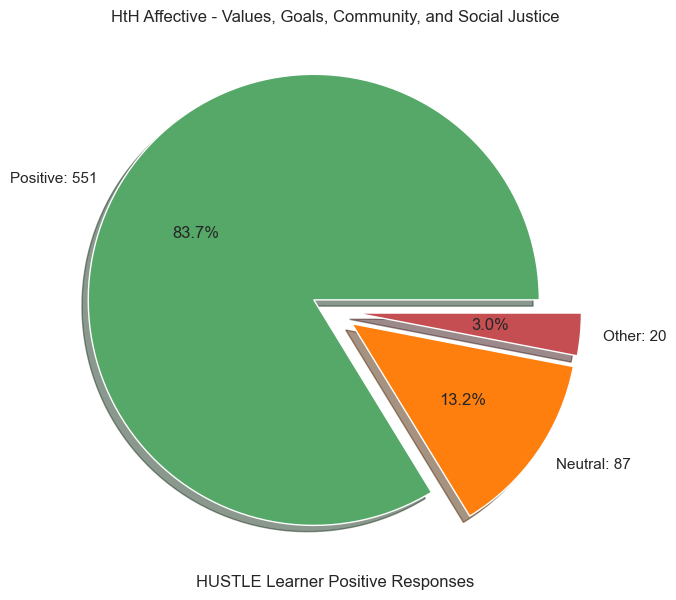

In [18]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(hustle_totals["pos"]), 'Neutral: {}'.format(hustle_totals["pos_with_n"] - hustle_totals["pos"]), 'Other: {}'.format(hustle_totals["valid"] - hustle_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (hustle_totals["pos"] / hustle_totals["valid"]) * 100
per_2 = ((hustle_totals["pos_with_n"] - hustle_totals["pos"])/ hustle_totals["valid"]) * 100
per_3 = ((hustle_totals["valid"] - hustle_totals["pos_with_n"])/ hustle_totals["valid"]) * 100

size_of_groups = [per, per_2, per_3]
explode = (0.1, 0.1, 0.1)  # this creates space between slices of the pie

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["g", "tab:orange", "r" ], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("HUSTLE Learner Positive Responses")
plt.title("HtH Affective - Values, Goals, Community, and Social Justice")
# plt.savefig('images/h_hth_affective_pie.png')
plt.show()

<b>For every question in the section of the survey pertaining to HtH Affective, there was a total of 658 responses given from HUSTLE learners. Of those responses, 638 (97%) were positive including neutral responses and 551 (83.7%) were positive not including neutral responses.

In [19]:
build = multi_response(post_build, ["Values_1", "Values_2", "Values_3", "SJ & Community_1", "Community_1", "Community_2", "Community_3", "TA_1", "TA_2", "TA_3", "TA_4", "Career Opportunities_1", "Career Opportunities_2", "Career Opportunities_3"])

build_totals = total_multi(build)

build, build_totals

({'Values_1': {'valid': 29, 'di': 1, 'sd': 0, 'n': 9, 'sa': 11, 'ag': 8},
  'Values_2': {'valid': 29, 'di': 1, 'sd': 0, 'n': 0, 'sa': 15, 'ag': 13},
  'Values_3': {'valid': 29, 'di': 2, 'sd': 0, 'n': 2, 'sa': 13, 'ag': 12},
  'SJ & Community_1': {'valid': 29,
   'di': 0,
   'sd': 0,
   'n': 0,
   'sa': 7,
   'ag': 22},
  'Community_1': {'valid': 29, 'di': 0, 'sd': 0, 'n': 8, 'sa': 11, 'ag': 10},
  'Community_2': {'valid': 29, 'di': 0, 'sd': 0, 'n': 2, 'sa': 12, 'ag': 15},
  'Community_3': {'valid': 29, 'di': 0, 'sd': 0, 'n': 3, 'sa': 7, 'ag': 19},
  'TA_1': {'valid': 29, 'di': 1, 'sd': 3, 'n': 5, 'sa': 16, 'ag': 4},
  'TA_2': {'valid': 29, 'di': 0, 'sd': 0, 'n': 1, 'sa': 11, 'ag': 17},
  'TA_3': {'valid': 29, 'di': 0, 'sd': 0, 'n': 1, 'sa': 8, 'ag': 20},
  'TA_4': {'valid': 29, 'di': 0, 'sd': 3, 'n': 6, 'sa': 8, 'ag': 12},
  'Career Opportunities_1': {'valid': 29,
   'di': 0,
   'sd': 0,
   'n': 3,
   'sa': 9,
   'ag': 17},
  'Career Opportunities_2': {'valid': 29,
   'di': 0,
   'sd':

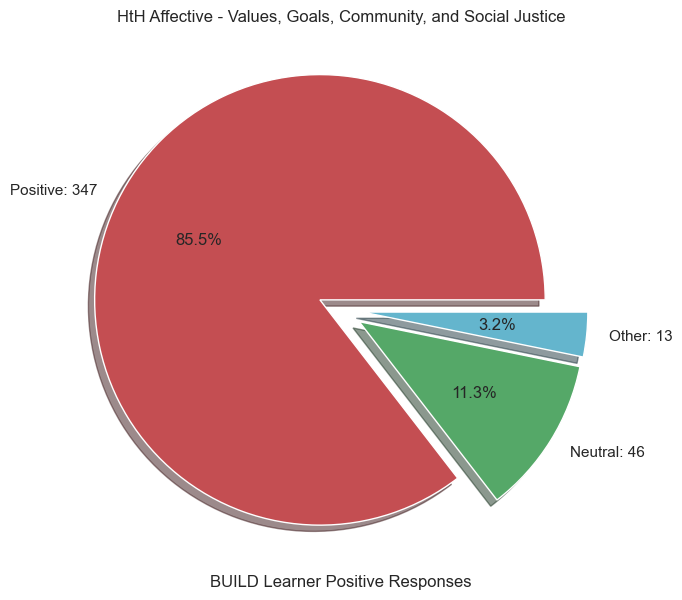

In [20]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(build_totals["pos"]), 'Neutral: {}'.format(build_totals["pos_with_n"] - build_totals["pos"]), 'Other: {}'.format(build_totals["valid"] - build_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (build_totals["pos"] / build_totals["valid"]) * 100
per_2 = ((build_totals["pos_with_n"] - build_totals["pos"])/ build_totals["valid"]) * 100
per_3 = ((build_totals["valid"] - build_totals["pos_with_n"])/ build_totals["valid"]) * 100

size_of_groups = [per, per_2, per_3]
explode = (0.1, 0.1, 0.1)  # this creates space between slices of the pie

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["r", "g", "c" ], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("BUILD Learner Positive Responses")
plt.title("HtH Affective - Values, Goals, Community, and Social Justice")
# plt.savefig('images/b_hth_affective_pie.png')
plt.show()

<b>For every question in the section of the survey pertaining to HtH Affective, there was a total of 406 responses given from BUILD learners. Of those responses, 393 (96.8%) of those responses were positive including neutral responses and 347 (85.5%) were positive not including neutral responses.

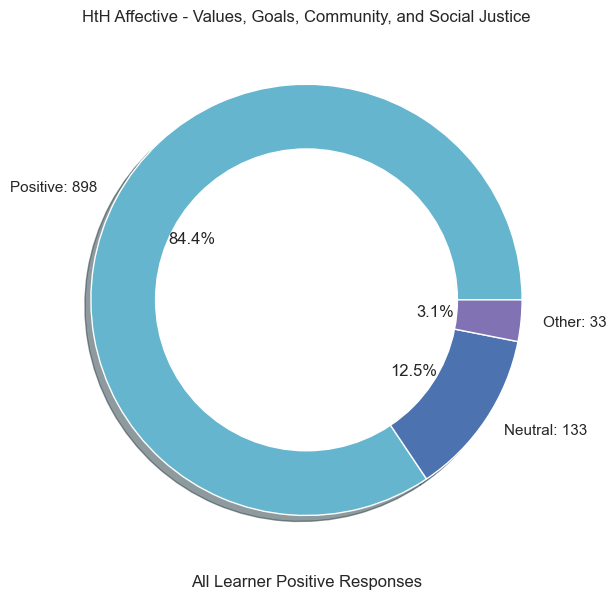

In [21]:
# create data

labels = ['Positive: {}'.format(build_totals["pos"] + hustle_totals["pos"]), 'Neutral: {}'.format((build_totals["pos_with_n"] + hustle_totals["pos_with_n"])-(build_totals["pos"] + hustle_totals["pos"])), 'Other: {}'.format((build_totals["valid"] + hustle_totals["valid"])-(build_totals["pos_with_n"] + hustle_totals["pos_with_n"]))]

per = ((build_totals["pos"] + hustle_totals["pos"]) / (build_totals["valid"] + hustle_totals["valid"])) * 100
per_2 = (((build_totals["pos_with_n"] + hustle_totals["pos_with_n"])-(build_totals["pos"] + hustle_totals["pos"])) / (build_totals["valid"] + hustle_totals["valid"])) * 100
per_3 = 100 - per - per_2

size_of_groups = [per, per_2, per_3]

# Create a pieplot
plt.pie(size_of_groups, colors=["c", "b", "m"], labels = labels, autopct='%1.1f%%', shadow=True)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.xlabel("All Learner Positive Responses")
plt.title("HtH Affective - Values, Goals, Community, and Social Justice")
# plt.savefig('images/hth_affective_donut.png')
plt.show()

<b>Overall, there were 1064 learner responses to the HtH Affective section of the survey. 1,031 (96.9%) of those responses were positive including neutral responses and 898 responses (84.4%) were positive not including neutral responses.

In [22]:
# intersectional tech identity

hustle = multi_response(post_hustle, ["Gee_1", "Gee_2", "Gee_3", "McAlpine_1", "McAlpine_2", "McAlpine_3", "McAlpine_4", "McAlpine_5"])

hustle_totals = total_multi(hustle)

hustle, hustle_totals

({'Gee_1': {'valid': 46, 'di': 0, 'sd': 1, 'n': 9, 'sa': 20, 'ag': 16},
  'Gee_2': {'valid': 46, 'di': 0, 'sd': 0, 'n': 5, 'sa': 25, 'ag': 16},
  'Gee_3': {'valid': 46, 'di': 0, 'sd': 0, 'n': 9, 'sa': 14, 'ag': 23},
  'McAlpine_1': {'valid': 46, 'di': 0, 'sd': 0, 'n': 7, 'sa': 18, 'ag': 21},
  'McAlpine_2': {'valid': 46, 'di': 0, 'sd': 0, 'n': 5, 'sa': 13, 'ag': 28},
  'McAlpine_3': {'valid': 46, 'di': 1, 'sd': 1, 'n': 13, 'sa': 11, 'ag': 20},
  'McAlpine_4': {'valid': 46, 'di': 0, 'sd': 0, 'n': 6, 'sa': 15, 'ag': 25},
  'McAlpine_5': {'valid': 46, 'di': 0, 'sd': 0, 'n': 3, 'sa': 12, 'ag': 31}},
 {'valid': 368, 'pos': 308, 'pos_with_n': 365})

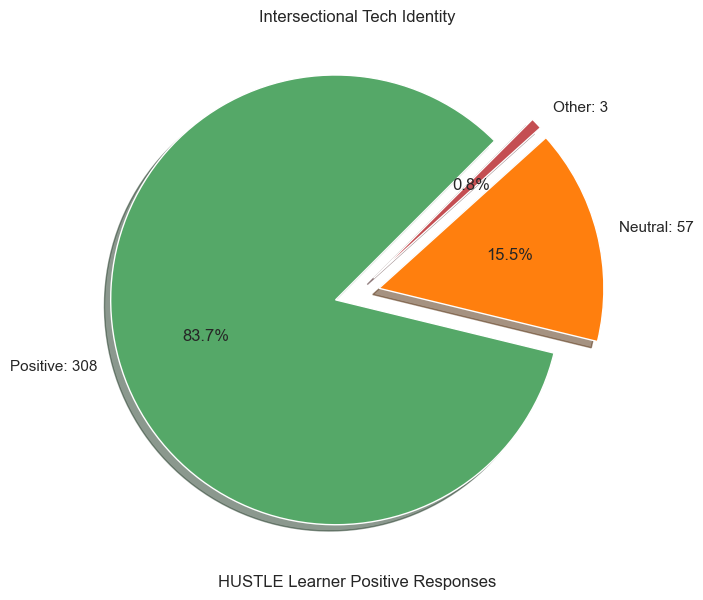

In [23]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(hustle_totals["pos"]), 'Neutral: {}'.format(hustle_totals["pos_with_n"] - hustle_totals["pos"]), 'Other: {}'.format(hustle_totals["valid"] - hustle_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (hustle_totals["pos"] / hustle_totals["valid"]) * 100
per_2 = ((hustle_totals["pos_with_n"] - hustle_totals["pos"])/ hustle_totals["valid"]) * 100
per_3 = ((hustle_totals["valid"] - hustle_totals["pos_with_n"])/ hustle_totals["valid"]) * 100

size_of_groups = [per, per_2, per_3]
explode = (0.1, 0.1, 0.1)  # this creates space between slices of the pie

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["g", "tab:orange", "r" ], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("HUSTLE Learner Positive Responses")
plt.title("Intersectional Tech Identity")
# plt.savefig('images/h_identity_pie.png')
plt.show()

<b>For every question in the section of the survey pertaining to Intersectional Tech Identity, there was a total of 368 responses given from HUSTLE learners. Of those responses, 365 (99.2%) of those responses were positive including neutral responses and 308 (83.7%) were positive not including neutral responses. 

In [24]:
build = multi_response(post_build, ["Gee_1", "Gee_2", "Gee_3", "McAlpine_1", "McAlpine_2", "McAlpine_3", "McAlpine_4", "McAlpine_5"])

build_totals = total_multi(build)

build, build_totals

({'Gee_1': {'valid': 27, 'di': 0, 'sd': 0, 'n': 7, 'sa': 8, 'ag': 12},
  'Gee_2': {'valid': 27, 'di': 0, 'sd': 2, 'n': 2, 'sa': 11, 'ag': 12},
  'Gee_3': {'valid': 27, 'di': 0, 'sd': 1, 'n': 9, 'sa': 6, 'ag': 11},
  'McAlpine_1': {'valid': 27, 'di': 0, 'sd': 1, 'n': 12, 'sa': 6, 'ag': 8},
  'McAlpine_2': {'valid': 27, 'di': 0, 'sd': 2, 'n': 3, 'sa': 10, 'ag': 12},
  'McAlpine_3': {'valid': 27, 'di': 0, 'sd': 4, 'n': 6, 'sa': 8, 'ag': 9},
  'McAlpine_4': {'valid': 27, 'di': 0, 'sd': 1, 'n': 3, 'sa': 6, 'ag': 17},
  'McAlpine_5': {'valid': 27, 'di': 0, 'sd': 0, 'n': 2, 'sa': 9, 'ag': 16}},
 {'valid': 216, 'pos': 161, 'pos_with_n': 205})

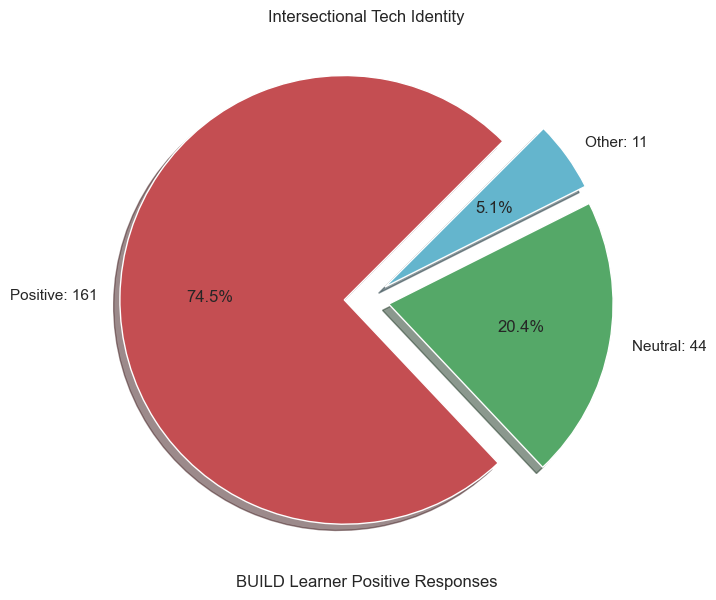

In [25]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(build_totals["pos"]), 'Neutral: {}'.format(build_totals["pos_with_n"] - build_totals["pos"]), 'Other: {}'.format(build_totals["valid"] - build_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (build_totals["pos"] / build_totals["valid"]) * 100
per_2 = ((build_totals["pos_with_n"] - build_totals["pos"])/ build_totals["valid"]) * 100
per_3 = ((build_totals["valid"] - build_totals["pos_with_n"])/ build_totals["valid"]) * 100

size_of_groups = [per, per_2, per_3]
explode = (0.1, 0.1, 0.1)  # this creates space between slices of the pie

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["r", "g", "c" ], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("BUILD Learner Positive Responses")
plt.title("Intersectional Tech Identity")
# plt.savefig('images/b_identity_pie.png')
plt.show()

<b>For every question in the section of the survey pertaining to Intersectional Tech Identity, there was a total of 216 responses given from BUILD learners. Of those responses, 205 (94.9%) of those responses were positive including neutral responses and 161 (74.5%) were positive not including neutral responses. 

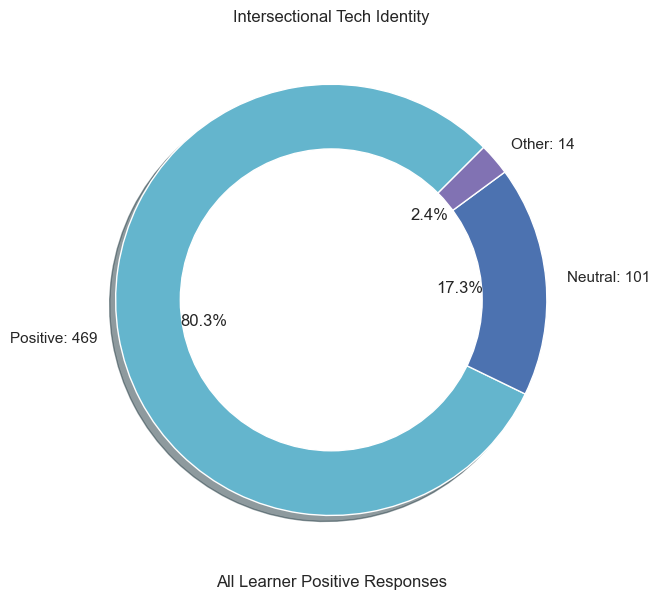

In [26]:
# create data

labels = ['Positive: {}'.format(build_totals["pos"] + hustle_totals["pos"]), 'Neutral: {}'.format((build_totals["pos_with_n"] + hustle_totals["pos_with_n"])-(build_totals["pos"] + hustle_totals["pos"])), 'Other: {}'.format((build_totals["valid"] + hustle_totals["valid"])-(build_totals["pos_with_n"] + hustle_totals["pos_with_n"]))]

per = ((build_totals["pos"] + hustle_totals["pos"]) / (build_totals["valid"] + hustle_totals["valid"])) * 100
per_2 = (((build_totals["pos_with_n"] + hustle_totals["pos_with_n"])-(build_totals["pos"] + hustle_totals["pos"])) / (build_totals["valid"] + hustle_totals["valid"])) * 100
per_3 = 100 - per - per_2

size_of_groups = [per, per_2, per_3]

# Create a pieplot
plt.pie(size_of_groups, colors=["c", "b", "m"], labels = labels, autopct='%1.1f%%', shadow=True, startangle=45)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.xlabel("All Learner Positive Responses")
plt.title("Intersectional Tech Identity")
# plt.savefig('images/identity_donut.png')
plt.show()

<b>Overall, there were 584 learner responses to the Intersectional Tech Identity section of the survey. 570 (97.6%) of those responses were positive including neutral responses and 469 responses (80.3%) were positive not including neutral responses. 
    
<hr style="border:2px solid black">
    
<b>Next we will be examining the learners responses to our inquiries about their ability to communicate about technology.</b> These questions are marked as the <b>QID1_1, QID1_2, QID1_3, QID1_4</b>, and the <b>QID1_5</b> columns within the dataframe. Learners had five choices to choose from as their response to these questions: <b>Strongly Disagree, Somewhat Disagree, Neutral, Somewhat Agree</b>, and <b>Strongly Agree. 

<img src="images/h_comm_about_tech.png" height=100% width=100%>

In [27]:
hustle = multi_response(post_hustle, ["QID1_1", "QID1_2", "QID1_3", "QID1_4", "QID1_5"])

hustle_totals = total_multi(hustle)

hustle, hustle_totals

({'QID1_1': {'valid': 52, 'di': 0, 'sd': 5, 'n': 5, 'sa': 26, 'ag': 16},
  'QID1_2': {'valid': 52, 'di': 3, 'sd': 5, 'n': 13, 'sa': 16, 'ag': 15},
  'QID1_3': {'valid': 52, 'di': 0, 'sd': 6, 'n': 12, 'sa': 19, 'ag': 15},
  'QID1_4': {'valid': 52, 'di': 0, 'sd': 1, 'n': 4, 'sa': 11, 'ag': 36},
  'QID1_5': {'valid': 52, 'di': 4, 'sd': 5, 'n': 15, 'sa': 19, 'ag': 9}},
 {'valid': 260, 'pos': 182, 'pos_with_n': 231})

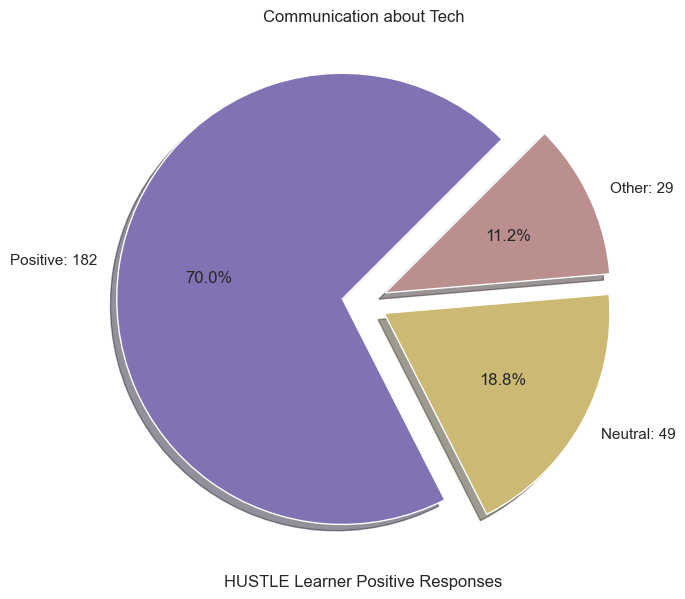

In [28]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(hustle_totals["pos"]), 'Neutral: {}'.format(hustle_totals["pos_with_n"] - hustle_totals["pos"]), 'Other: {}'.format(hustle_totals["valid"] - hustle_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (hustle_totals["pos"] / hustle_totals["valid"]) * 100
per_2 = ((hustle_totals["pos_with_n"] - hustle_totals["pos"])/ hustle_totals["valid"]) * 100
per_3 = ((hustle_totals["valid"] - hustle_totals["pos_with_n"])/ hustle_totals["valid"]) * 100

size_of_groups = [per, per_2, per_3]
explode = (0.1, 0.1, 0.1)  # this creates space between slices of the pie

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["m", "y", "rosybrown" ], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("HUSTLE Learner Positive Responses")
plt.title("Communication about Tech")
# plt.savefig('images/h_comm_about_just_tech_pie.png')
plt.show()

<b>There was a total of 260 responses given from HUSTLE learners. Of those responses, 231 (88.8%) were positive including neutral responses and 182 (70%) were positive not including neutral responses. 

<img src="images/b_comm_about_tech.png" height=100% width=100%>

In [29]:
build = multi_response(post_build, ["QID1_1", "QID1_2", "QID1_3", "QID1_4", "QID1_5"])

build_totals = total_multi(build)

build, build_totals

({'QID1_1': {'valid': 31, 'di': 2, 'sd': 1, 'n': 6, 'sa': 11, 'ag': 11},
  'QID1_2': {'valid': 31, 'di': 1, 'sd': 6, 'n': 5, 'sa': 11, 'ag': 8},
  'QID1_3': {'valid': 31, 'di': 3, 'sd': 1, 'n': 4, 'sa': 8, 'ag': 15},
  'QID1_4': {'valid': 31, 'di': 3, 'sd': 2, 'n': 1, 'sa': 6, 'ag': 19},
  'QID1_5': {'valid': 31, 'di': 2, 'sd': 3, 'n': 6, 'sa': 13, 'ag': 7}},
 {'valid': 155, 'pos': 109, 'pos_with_n': 131})

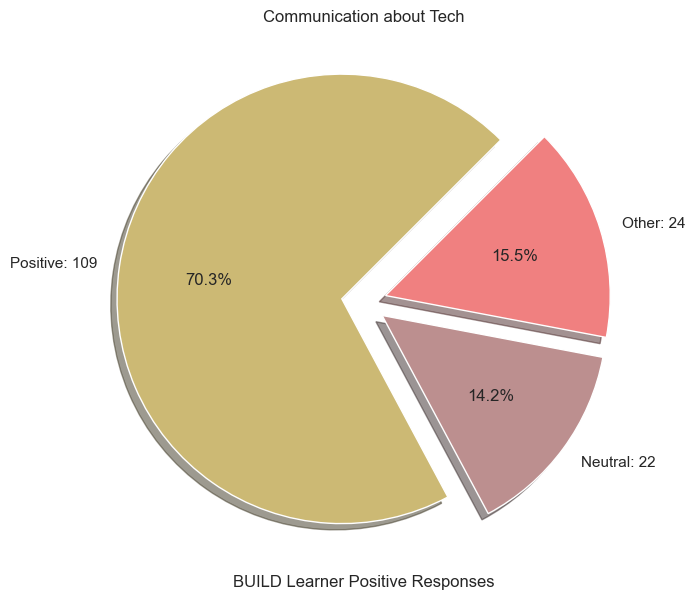

In [30]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(build_totals["pos"]), 'Neutral: {}'.format(build_totals["pos_with_n"] - build_totals["pos"]), 'Other: {}'.format(build_totals["valid"] - build_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (build_totals["pos"] / build_totals["valid"]) * 100
per_2 = ((build_totals["pos_with_n"] - build_totals["pos"])/ build_totals["valid"]) * 100
per_3 = ((build_totals["valid"] - build_totals["pos_with_n"])/ build_totals["valid"]) * 100

size_of_groups = [per, per_2, per_3]
explode = (0.1, 0.1, 0.1)  # this creates space between slices of the pie

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["y", "rosybrown", "lightcoral" ], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("BUILD Learner Positive Responses")
plt.title("Communication about Tech")
# plt.savefig('images/b_comm_about_just_tech_pie.png')
plt.show()

<b>There was a total of 155 responses given from BUILD learners. Of those responses, 131 (84.5%) were positive including neutral responses and 109 (70.3%) were positive not including neutral responses. 

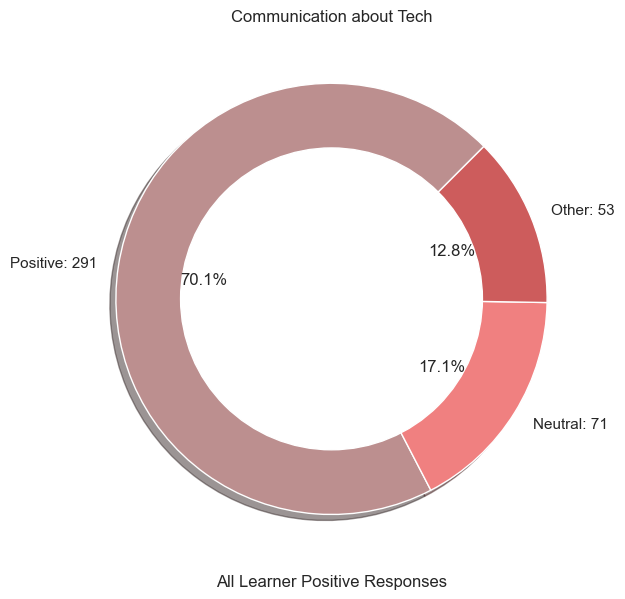

In [31]:
# create data

labels = ['Positive: {}'.format(build_totals["pos"] + hustle_totals["pos"]), 'Neutral: {}'.format((build_totals["pos_with_n"] + hustle_totals["pos_with_n"])-(build_totals["pos"] + hustle_totals["pos"])), 'Other: {}'.format((build_totals["valid"] + hustle_totals["valid"])-(build_totals["pos_with_n"] + hustle_totals["pos_with_n"]))]

per = ((build_totals["pos"] + hustle_totals["pos"]) / (build_totals["valid"] + hustle_totals["valid"])) * 100
per_2 = (((build_totals["pos_with_n"] + hustle_totals["pos_with_n"])-(build_totals["pos"] + hustle_totals["pos"])) / (build_totals["valid"] + hustle_totals["valid"])) * 100
per_3 = 100 - per - per_2

size_of_groups = [per, per_2, per_3]

# Create a pieplot
plt.pie(size_of_groups, colors=["rosybrown", "lightcoral", "indianred"], labels = labels, autopct='%1.1f%%', shadow=True, startangle=45)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.xlabel("All Learner Positive Responses")
plt.title("Communication about Tech")
# plt.savefig('images/comm_about_just_tech_donut.png')
plt.show()

<b>Overall, there was a total of 415 responses given from all learners. Of those responses, 362 (87.2%) were positive including neutral responses and 291 (70.1%) were positive not including neutral responses. 

# I can communicate verbally or in writing to others about technology or programming.

In [32]:
get_responses(post_hustle, "QID1_1")

{'valid': 52, 'di': 0, 'sd': 5, 'n': 5, 'sa': 26, 'ag': 16}

<figure>
  <figcaption><h3>HUSTLE Responses</h3></figcaption>
  <img src="images/h_qid1_table.png" height=100% width=100%>
</figure>

In [33]:
get_responses(post_build, "QID1_1")

{'valid': 31, 'di': 2, 'sd': 1, 'n': 6, 'sa': 11, 'ag': 11}

<figure>
  <figcaption><h3>BUILD Responses</h3></figcaption>
  <img src="images/b_qid1_table.png" height=100% width=100%>
</figure>

# I can give a short talk to an audience about technology or programming.

In [34]:
get_responses(post_hustle, "QID1_2")

{'valid': 52, 'di': 3, 'sd': 5, 'n': 13, 'sa': 16, 'ag': 15}

<figure>
  <figcaption><h3>HUSTLE Responses</h3></figcaption>
  <img src="images/h_qid2_table.png" height=100% width=100%>
</figure>

In [35]:
get_responses(post_build, "QID1_2")

{'valid': 31, 'di': 1, 'sd': 6, 'n': 5, 'sa': 11, 'ag': 8}

<figure>
  <figcaption><h3>BUILD Responses</h3></figcaption>
  <img src="images/b_qid2_table.png" height=100% width=100%>
</figure>

# I can write code to complete a simple task.

In [36]:
get_responses(post_hustle, "QID1_3")

{'valid': 52, 'di': 0, 'sd': 6, 'n': 12, 'sa': 19, 'ag': 15}

<figure>
  <figcaption><h3>HUSTLE Responses</h3></figcaption>
  <img src="images/h_qid3_table.png" height=100% width=100%>
</figure>

In [37]:
get_responses(post_build, "QID1_3")

{'valid': 31, 'di': 3, 'sd': 1, 'n': 4, 'sa': 8, 'ag': 15}

<figure>
  <figcaption><h3>BUILD Responses</h3></figcaption>
  <img src="images/b_qid3_table.png" height=100% width=100%>
</figure>

# I increased my programming skills in this program.

In [38]:
get_responses(post_hustle, "QID1_4")

{'valid': 52, 'di': 0, 'sd': 1, 'n': 4, 'sa': 11, 'ag': 36}

<figure>
  <figcaption><h3>HUSTLE Responses</h3></figcaption>
  <img src="images/h_qid4_table.png" height=100% width=100%>
</figure>

In [39]:
get_responses(post_build, "QID1_4")

{'valid': 31, 'di': 3, 'sd': 2, 'n': 1, 'sa': 6, 'ag': 19}

<figure>
  <figcaption><h3>BUILD Responses</h3></figcaption>
  <img src="images/b_qid4_table.png" height=100% width=100%>
</figure>

# I could explain or storyboard a software idea that I have.

In [40]:
get_responses(post_hustle, "QID1_5")

{'valid': 52, 'di': 4, 'sd': 5, 'n': 15, 'sa': 19, 'ag': 9}

<figure>
  <figcaption><h3>HUSTLE Responses</h3></figcaption>
  <img src="images/h_qid5_table.png" height=100% width=100%>
</figure>

In [41]:
get_responses(post_build, "QID1_5")

{'valid': 31, 'di': 2, 'sd': 3, 'n': 6, 'sa': 13, 'ag': 7}

<figure>
  <figcaption><h3>BUILD Responses</h3></figcaption>
  <img src="images/b_qid5_table.png" height=100% width=100%>
</figure>

<hr style="border:2px solid black">

<b>Next we will be examining the learners responses to our inquiries about their general computer science skills.</b> These questions are marked as <b>Programming Skills_1, Programming Skills_2</b>, and <b>Programming Skills_3</b> in the dataframe column names. Learners had five choices to choose from as their response for these questions: <b>Never, Rarely, Sometimes, Very often, and Always.</b>

<b>It is important to note that there are no "neutral" responses for the questions in this section as "Sometimes" still suggest some positive assessment.</b>

<img src="images/h_gen_cs.png" height=100% width=100%>

In [42]:
hustle = multi_response(post_hustle, ["Programming Skills_1", "Programming Skills_2", "Programming Skills_3"])

hustle_totals = total_multi(hustle)

hustle, hustle_totals

({'Programming Skills_1': {'valid': 52,
   'n': 1,
   'r': 1,
   's': 13,
   'v': 24,
   'a': 13},
  'Programming Skills_2': {'valid': 52,
   'n': 3,
   'r': 12,
   's': 16,
   'v': 17,
   'a': 4},
  'Programming Skills_3': {'valid': 52,
   'n': 3,
   'r': 5,
   's': 20,
   'v': 19,
   'a': 5}},
 {'valid': 156, 'pos': 131, 'pos_with_n': 131})

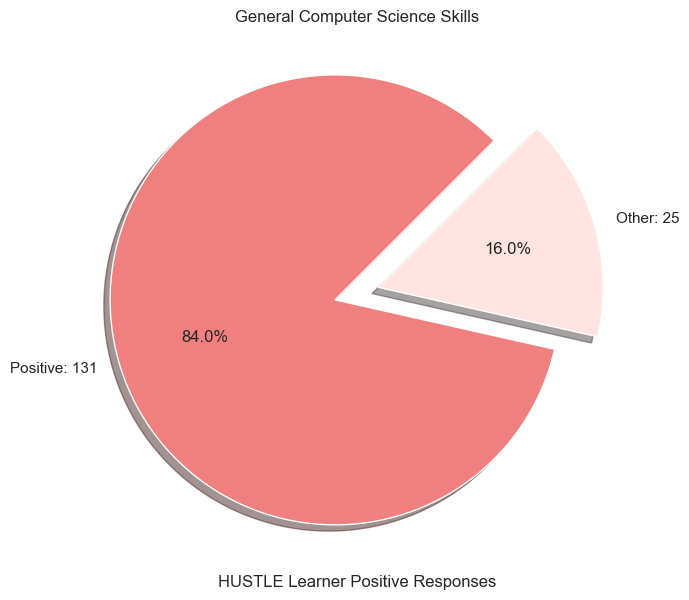

In [43]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(hustle_totals["pos"]), 'Other: {}'.format(hustle_totals["valid"] - hustle_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (hustle_totals["pos"] / hustle_totals["valid"]) * 100
per_2 = 100 - per

size_of_groups = [per, per_2]
explode = (0.1, 0.1)  # this creates space between slices of the pie

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["lightcoral", "mistyrose"], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("HUSTLE Learner Positive Responses")
plt.title("General Computer Science Skills")
# plt.savefig('images/h_gen_cs_pie.png')
plt.show()

<b>There was a total of 156 responses given from HUSTLE learners. Of those responses, 131 (84%) were positive.</b>

<img src="images/b_gen_cs.png" height=100% width=100%>

In [44]:
build = multi_response(post_build, ["Programming Skills_1", "Programming Skills_2", "Programming Skills_3"])

build_totals = total_multi(build)

build, build_totals

({'Programming Skills_1': {'valid': 31,
   'n': 0,
   'r': 1,
   's': 11,
   'v': 12,
   'a': 7},
  'Programming Skills_2': {'valid': 31,
   'n': 0,
   'r': 8,
   's': 15,
   'v': 7,
   'a': 1},
  'Programming Skills_3': {'valid': 31,
   'n': 0,
   'r': 2,
   's': 15,
   'v': 7,
   'a': 7}},
 {'valid': 93, 'pos': 82, 'pos_with_n': 82})

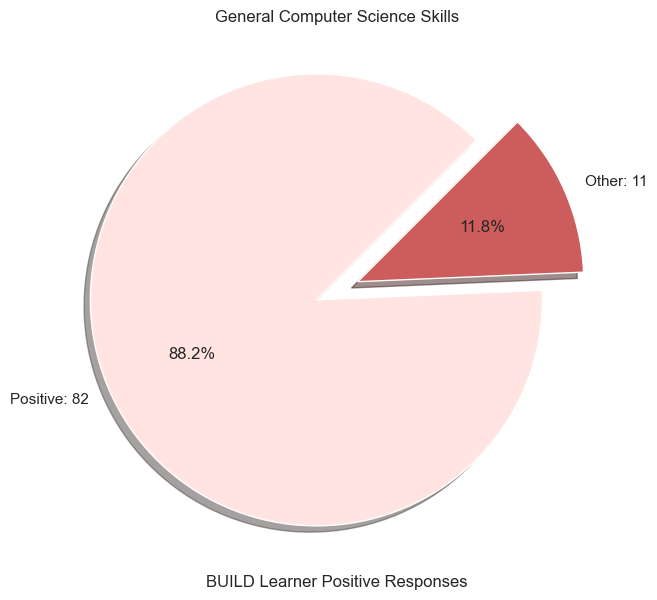

In [45]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(build_totals["pos"]), 'Other: {}'.format(build_totals["valid"] - build_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (build_totals["pos"] / build_totals["valid"]) * 100
per_2 = 100 - per

size_of_groups = [per, per_2]
explode = (0.1, 0.1)  # this creates space between slices of the pie

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["mistyrose", "indianred" ], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("BUILD Learner Positive Responses")
plt.title("General Computer Science Skills")
# plt.savefig('images/b_gen_cs_pie.png')
plt.show()

<b>There was a total of 93 responses given from BUILD learners. Of those responses, 82 (88.2%) were positive.</b>

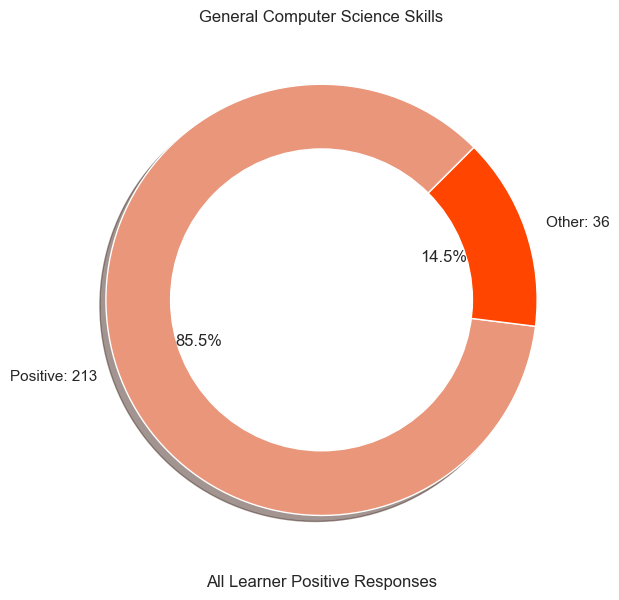

In [46]:
# create data

labels = ['Positive: {}'.format(build_totals["pos"] + hustle_totals["pos"]), 'Other: {}'.format((build_totals["valid"] + hustle_totals["valid"])-(build_totals["pos_with_n"] + hustle_totals["pos_with_n"]))]

per = ((build_totals["pos"] + hustle_totals["pos"]) / (build_totals["valid"] + hustle_totals["valid"])) * 100
per_2 = 100 - per

size_of_groups = [per, per_2]

# Create a pieplot
plt.pie(size_of_groups, colors=["darksalmon", "orangered"], labels = labels, autopct='%1.1f%%', shadow=True, startangle=45)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.xlabel("All Learner Positive Responses")
plt.title("General Computer Science Skills")
# plt.savefig('images/gen_cs_donut.png')
plt.show()

<b>Overall, there was a total of 249 responses given from all learners. Of those responses, 213 (85.5%) were positive.</b> 

# When I have errors in my code, I know of a few things to try or look for.	

In [47]:
get_responses(post_hustle, "Programming Skills_1")

{'valid': 52, 'n': 1, 'r': 1, 's': 13, 'v': 24, 'a': 13}

<figure>
  <figcaption><h3>HUSTLE Responses</h3></figcaption>
  <img src="images/h_program1_table.png" height=100% width=100%>
</figure>

In [48]:
get_responses(post_build, "Programming Skills_1")

{'valid': 31, 'n': 0, 'r': 1, 's': 11, 'v': 12, 'a': 7}

<figure>
  <figcaption><h3>BUILD Responses</h3></figcaption>
  <img src="images/b_program1_table.png" height=100% width=100%>
</figure>

# When I write new code, I leave myself enough comments and notes to know what I did.

In [49]:
get_responses(post_hustle, "Programming Skills_2")

{'valid': 52, 'n': 3, 'r': 12, 's': 16, 'v': 17, 'a': 4}

<figure>
  <figcaption><h3>HUSTLE Responses</h3></figcaption>
  <img src="images/h_program2_table.png" height=100% width=100%>
</figure>

In [50]:
get_responses(post_build, "Programming Skills_2")

{'valid': 31, 'n': 0, 'r': 8, 's': 15, 'v': 7, 'a': 1}

<figure>
  <figcaption><h3>BUILD Responses</h3></figcaption>
  <img src="images/b_program2_table.png" height=100% width=100%>
</figure>

# I know where to look for new data to test or model with.

In [51]:
get_responses(post_hustle, "Programming Skills_3")

{'valid': 52, 'n': 3, 'r': 5, 's': 20, 'v': 19, 'a': 5}

<figure>
  <figcaption><h3>HUSTLE Responses</h3></figcaption>
  <img src="images/h_program3_table.png" height=100% width=100%>
</figure>

In [52]:
get_responses(post_build, "Programming Skills_3")

{'valid': 31, 'n': 0, 'r': 2, 's': 15, 'v': 7, 'a': 7}

<figure>
  <figcaption><h3>BUILD Responses</h3></figcaption>
  <img src="images/b_program3_table.png" height=100% width=100%>
</figure>

<hr style="border:2px solid black">

<b>Next is the evaluation of learners’ responses to inquiries about their proficiency using Python.</b> These questions are marked as <b>Python_1, Python_2,</b> and <b>Python_3</b> in the dataframe column names. Learners had four choices to choose from as their response to these questions: <b>Not confident at all, Slightly confident, Fairly confident,</b> and <b>Very confident.

<b>It is important to note that there are no "neutral" responses for the questions in this section as "Slightly confident" still suggest some positive assessment. Also, the questions in this section differ between HUSTLE and BUILD learners.</b>
    
<img src="images/h_python.png" height=100% width=100%>

In [53]:
hustle = multi_response(post_hustle, ["Python_1", "Python_2", "Python_3"])

hustle_totals = total_multi(hustle)

hustle, hustle_totals

({'Python_1': {'valid': 52, 'n': 2, 's': 15, 'f': 26, 'v': 9},
  'Python_2': {'valid': 52, 'n': 1, 's': 16, 'f': 16, 'v': 19},
  'Python_3': {'valid': 52, 'n': 4, 's': 14, 'f': 20, 'v': 14}},
 {'valid': 156, 'pos': 149, 'pos_with_n': 149})

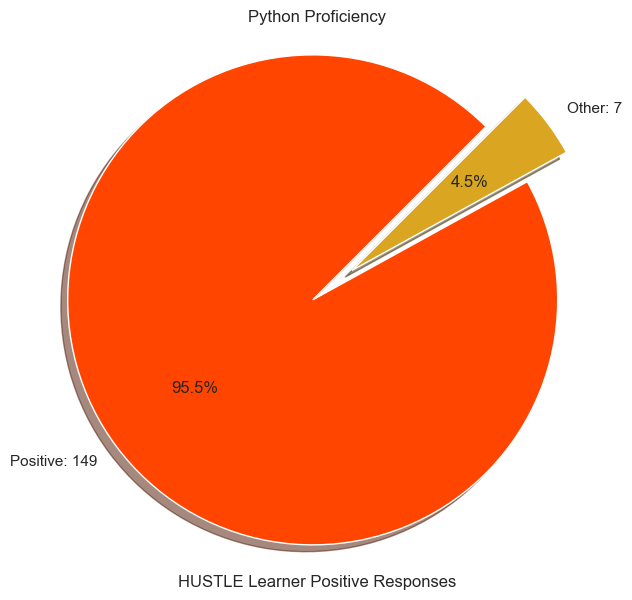

In [54]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(hustle_totals["pos"]), 'Other: {}'.format(hustle_totals["valid"] - hustle_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (hustle_totals["pos"] / hustle_totals["valid"]) * 100
per_2 = 100 - per

size_of_groups = [per, per_2]
explode = (0.1, 0.1)  # this creates space between slices of the pie

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["orangered", "goldenrod"], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("HUSTLE Learner Positive Responses")
plt.title("Python Proficiency")
# plt.savefig('images/h_python_pie.png')
plt.show()

<b>There was a total of 156 responses given from HUSTLE learners. Of those responses, 149 (95.5%) were positive.</b>

<img src="images/b_python.png" height=100% width=100%>

In [55]:
build = multi_response(post_build, ["Python_1", "Python_2", "Python_3"])

build_totals = total_multi(build)

build, build_totals

({'Python_1': {'valid': 31, 'n': 1, 's': 12, 'f': 9, 'v': 9},
  'Python_2': {'valid': 31, 'n': 1, 's': 7, 'f': 13, 'v': 10},
  'Python_3': {'valid': 31, 'n': 3, 's': 6, 'f': 16, 'v': 6}},
 {'valid': 93, 'pos': 88, 'pos_with_n': 88})

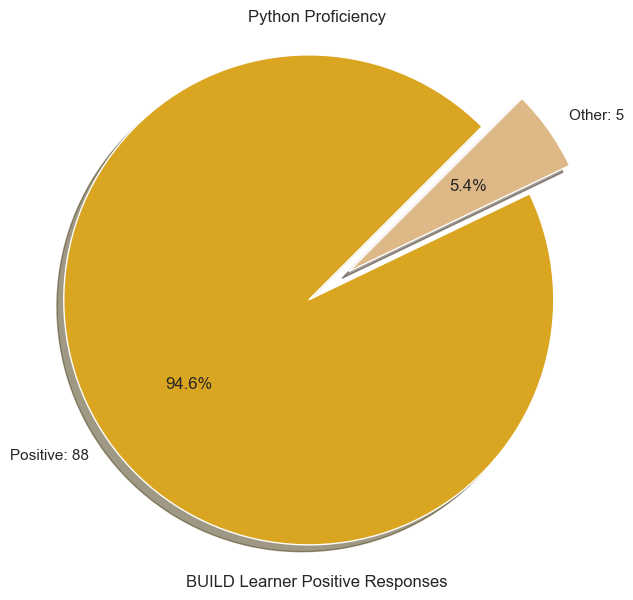

In [56]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(build_totals["pos"]), 'Other: {}'.format(build_totals["valid"] - build_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (build_totals["pos"] / build_totals["valid"]) * 100
per_2 = 100 - per

size_of_groups = [per, per_2]
explode = (0.1, 0.1)  # this creates space between slices of the pie

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["goldenrod", "burlywood"], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("BUILD Learner Positive Responses")
plt.title("Python Proficiency")
# plt.savefig('images/b_python_pie.png')
plt.show()

<b>There was a total of 93 responses given from BUILD learners. Of those responses, 88 (94.6%) were positive.</b>

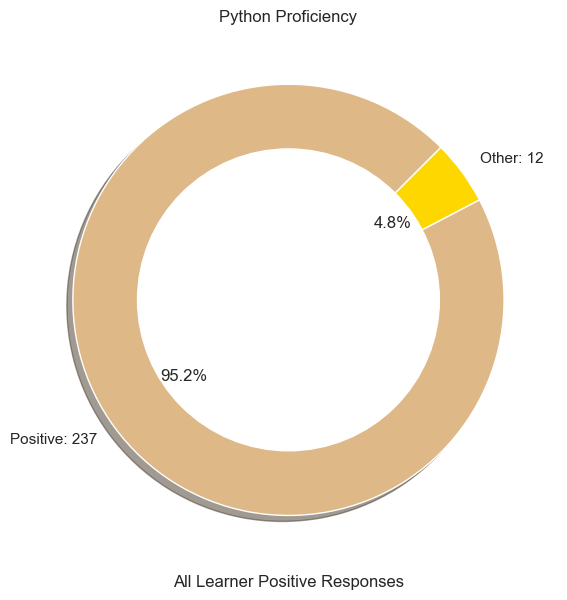

In [57]:
# create data

labels = ['Positive: {}'.format(build_totals["pos"] + hustle_totals["pos"]), 'Other: {}'.format((build_totals["valid"] + hustle_totals["valid"])-(build_totals["pos_with_n"] + hustle_totals["pos_with_n"]))]

per = ((build_totals["pos"] + hustle_totals["pos"]) / (build_totals["valid"] + hustle_totals["valid"])) * 100
per_2 = 100 - per

size_of_groups = [per, per_2]

# Create a pieplot
plt.pie(size_of_groups, colors=["burlywood", "gold"], labels = labels, autopct='%1.1f%%', shadow=True, startangle=45)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.xlabel("All Learner Positive Responses")
plt.title("Python Proficiency")
# plt.savefig('images/python_donut.png')
plt.show()

<b>Overall, there was a total of 249 responses given from all learners. Of those responses, 237 (95.2%) were positive.</b> 

# [HUSTLE] I know how to index values from a list in Python.

In [58]:
get_responses(post_hustle, "Python_1")

{'valid': 52, 'n': 2, 's': 15, 'f': 26, 'v': 9}

<figure>
  <figcaption><h3>HUSTLE Responses</h3></figcaption>
  <img src="images/h_python1_table.png" height=100% width=100%>
</figure>

# [BUILD] I know how to index values from lists and dictionaries in Python.

In [59]:
get_responses(post_build, "Python_1")

{'valid': 31, 'n': 1, 's': 12, 'f': 9, 'v': 9}

<figure>
  <figcaption><h3>BUILD Responses</h3></figcaption>
  <img src="images/b_python1_table.png" height=100% width=100%>
</figure>

# [HUSTLE] I know how to create a dictionary from scratch in Python.

In [60]:
get_responses(post_hustle, "Python_2")

{'valid': 52, 'n': 1, 's': 16, 'f': 16, 'v': 19}

<figure>
  <figcaption><h3>HUSTLE Responses</h3></figcaption>
  <img src="images/h_python2_table.png" height=100% width=100%>
</figure>

# [BUILD] I know how to use the pandas method to perform basic data manipulation in Python, such as filtering the data.

In [61]:
get_responses(post_build, "Python_2")

{'valid': 31, 'n': 1, 's': 7, 'f': 13, 'v': 10}

<figure>
  <figcaption><h3>BUILD Responses</h3></figcaption>
  <img src="images/b_python2_table.png" height=100% width=100%>
</figure>

# [HUSTLE] I know how to run loops through lists and dictionaries.

In [62]:
get_responses(post_hustle, "Python_3")

{'valid': 52, 'n': 4, 's': 14, 'f': 20, 'v': 14}

<figure>
  <figcaption><h3>HUSTLE Responses</h3></figcaption>
  <img src="images/h_python3_table.png" height=100% width=100%>
</figure>

# [BUILD] I know how to create data visualizations such as scatterplots and heatmaps, using Python.

In [63]:
get_responses(post_build, "Python_3")

{'valid': 31, 'n': 3, 's': 6, 'f': 16, 'v': 6}

<figure>
  <figcaption><h3>BUILD Responses</h3></figcaption>
  <img src="images/b_python3_table.png" height=100% width=100%>
</figure>

<hr style="border:2px solid black">

<b>Next is the evaluation of learners’ responses to inquiries about their values around using data and technology properly.</b> These questions are marked as <b>Values_1, Values_2,</b> and <b>Values_3</b> in the dataframe column names. Learners had five choices to choose from as their response to these questions: <b>Strongly Disagree, Somewhat Disagree, Neutral, Somewhat Agree,</b> and <b>Strongly Agree.</b>
    
<img src="images/h_techval.png" height=100% width=100%>

In [64]:
hustle = multi_response(post_hustle, ["Values_1", "Values_2", "Values_3"])

hustle_totals = total_multi(hustle)

hustle, hustle_totals

({'Values_1': {'valid': 47, 'di': 0, 'sd': 0, 'n': 18, 'sa': 14, 'ag': 15},
  'Values_2': {'valid': 47, 'di': 0, 'sd': 0, 'n': 6, 'sa': 11, 'ag': 30},
  'Values_3': {'valid': 47, 'di': 0, 'sd': 1, 'n': 7, 'sa': 17, 'ag': 22}},
 {'valid': 141, 'pos': 109, 'pos_with_n': 140})

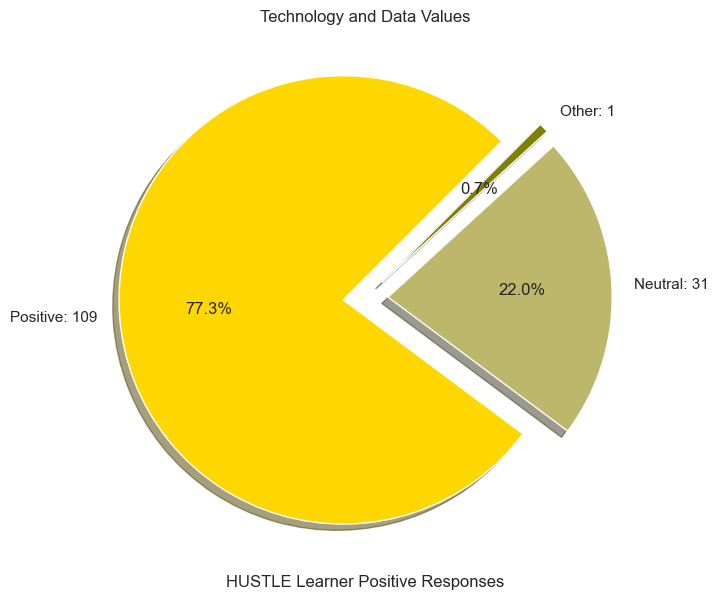

In [65]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(hustle_totals["pos"]), 'Neutral: {}'.format(hustle_totals["pos_with_n"] - hustle_totals["pos"]), 'Other: {}'.format(hustle_totals["valid"] - hustle_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (hustle_totals["pos"] / hustle_totals["valid"]) * 100
per_2 = ((hustle_totals["pos_with_n"] - hustle_totals["pos"])/ hustle_totals["valid"]) * 100
per_3 = ((hustle_totals["valid"] - hustle_totals["pos_with_n"])/ hustle_totals["valid"]) * 100

size_of_groups = [per, per_2, per_3]
explode = (0.1, 0.1, 0.1)  # this creates space between slices of the pie

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["gold", "darkkhaki", "olive" ], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("HUSTLE Learner Positive Responses")
plt.title("Technology and Data Values")
# plt.savefig('images/h_techval_pie.png')
plt.show()

<b>There was a total of 141 responses given from HUSTLE learners. Of those responses, 140 (99.3%) were positive including neutral responses. 109 (77.3%) were positive not including neutral responses.</b>

<img src="images/b_techval.png" height=100% width=100%>

In [66]:
build = multi_response(post_build, ["Values_1", "Values_2", "Values_3"])

build_totals = total_multi(build)

build, build_totals

({'Values_1': {'valid': 29, 'di': 1, 'sd': 0, 'n': 9, 'sa': 11, 'ag': 8},
  'Values_2': {'valid': 29, 'di': 1, 'sd': 0, 'n': 0, 'sa': 15, 'ag': 13},
  'Values_3': {'valid': 29, 'di': 2, 'sd': 0, 'n': 2, 'sa': 13, 'ag': 12}},
 {'valid': 87, 'pos': 72, 'pos_with_n': 83})

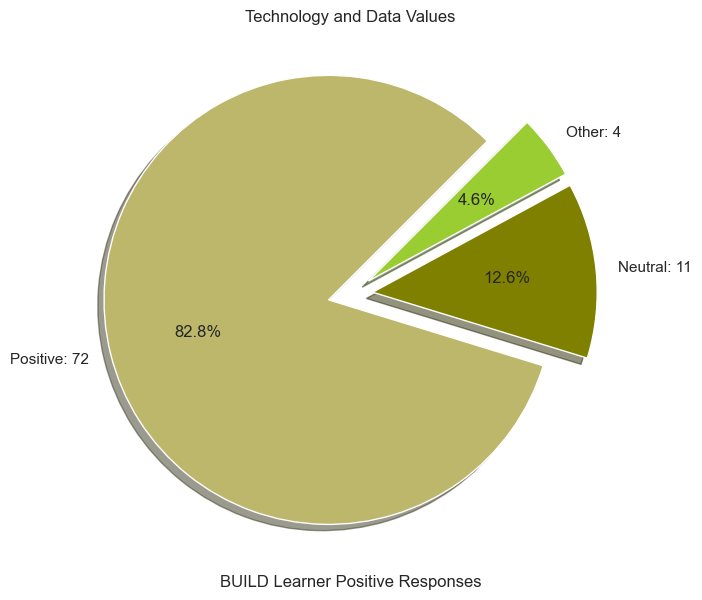

In [67]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(build_totals["pos"]), 'Neutral: {}'.format(build_totals["pos_with_n"] - build_totals["pos"]), 'Other: {}'.format(build_totals["valid"] - build_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (build_totals["pos"] / build_totals["valid"]) * 100
per_2 = ((build_totals["pos_with_n"] - build_totals["pos"])/ build_totals["valid"]) * 100
per_3 = ((build_totals["valid"] - build_totals["pos_with_n"])/ build_totals["valid"]) * 100

size_of_groups = [per, per_2, per_3]
explode = (0.1, 0.1, 0.1)  # this creates space between slices of the pie

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["darkkhaki", "olive", "yellowgreen" ], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("BUILD Learner Positive Responses")
plt.title("Technology and Data Values")
# plt.savefig('images/b_techval_pie.png')
plt.show()

<b>There was a total of 87 responses given from BUILD learners. Of those responses, 83 (95.4%) were positive including neutral responses and 72 (82.8%) were positive not including neutral responses. 

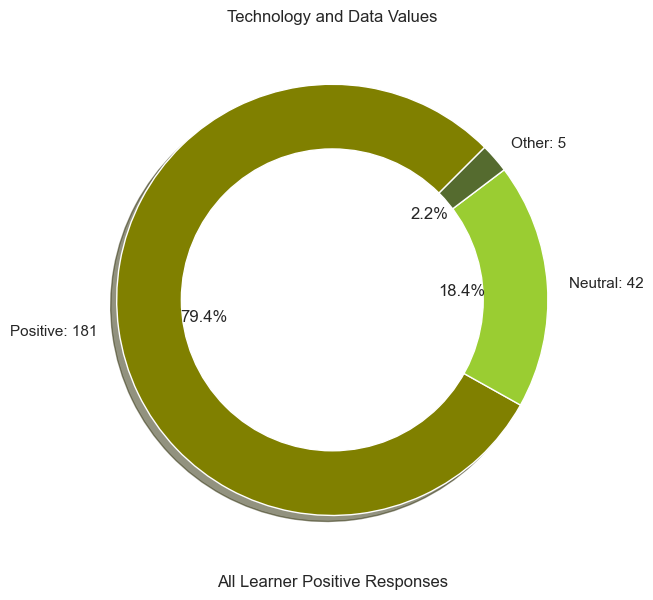

In [68]:
# create data

labels = ['Positive: {}'.format(build_totals["pos"] + hustle_totals["pos"]), 'Neutral: {}'.format((build_totals["pos_with_n"] + hustle_totals["pos_with_n"])-(build_totals["pos"] + hustle_totals["pos"])), 'Other: {}'.format((build_totals["valid"] + hustle_totals["valid"])-(build_totals["pos_with_n"] + hustle_totals["pos_with_n"]))]

per = ((build_totals["pos"] + hustle_totals["pos"]) / (build_totals["valid"] + hustle_totals["valid"])) * 100
per_2 = (((build_totals["pos_with_n"] + hustle_totals["pos_with_n"])-(build_totals["pos"] + hustle_totals["pos"])) / (build_totals["valid"] + hustle_totals["valid"])) * 100
per_3 = 100 - per - per_2

size_of_groups = [per, per_2, per_3]

# Create a pieplot
plt.pie(size_of_groups, colors=["olive", "yellowgreen", "darkolivegreen"], labels = labels, autopct='%1.1f%%', shadow=True, startangle=45)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.xlabel("All Learner Positive Responses")
plt.title("Technology and Data Values")
# plt.savefig('images/techval_donut.png')
plt.show()

<b>Overall, there was a total of 228 responses given from all learners. Of those responses, 223 (97.8%) were positive including neutral responses and 181 (79.4%) were positive not including neutral responses. </b>
    
# Data providers can exercise their power.

In [69]:
get_responses(post_hustle, "Values_1")

{'valid': 47, 'di': 0, 'sd': 0, 'n': 18, 'sa': 14, 'ag': 15}

<figure>
  <figcaption><h3>HUSTLE Responses</h3></figcaption>
  <img src="images/h_values1_table.png" height=100% width=100%>
</figure>

In [70]:
get_responses(post_build, "Values_1")

{'valid': 29, 'di': 1, 'sd': 0, 'n': 9, 'sa': 11, 'ag': 8}

<figure>
  <figcaption><h3>BUILD Responses</h3></figcaption>
  <img src="images/b_values1_table.png" height=100% width=100%>
</figure>

# When communities define what they want from technology, it can be used for good.

In [71]:
get_responses(post_hustle, "Values_2")

{'valid': 47, 'di': 0, 'sd': 0, 'n': 6, 'sa': 11, 'ag': 30}

<figure>
  <figcaption><h3>HUSTLE Responses</h3></figcaption>
  <img src="images/h_values2_table.png" height=100% width=100%>
</figure>

In [72]:
get_responses(post_build, "Values_2")

{'valid': 29, 'di': 1, 'sd': 0, 'n': 0, 'sa': 15, 'ag': 13}

<figure>
  <figcaption><h3>BUILD Responses</h3></figcaption>
  <img src="images/b_values2_table.png" height=100% width=100%>
</figure>

# Good technical solutions work well and meet the needs of diverse groups of people.

In [73]:
get_responses(post_hustle, "Values_3")

{'valid': 47, 'di': 0, 'sd': 1, 'n': 7, 'sa': 17, 'ag': 22}

<figure>
  <figcaption><h3>HUSTLE Responses</h3></figcaption>
  <img src="images/h_values3_table.png" height=100% width=100%>
</figure>

In [74]:
get_responses(post_build, "Values_3")

{'valid': 29, 'di': 2, 'sd': 0, 'n': 2, 'sa': 13, 'ag': 12}

<figure>
  <figcaption><h3>BUILD Responses</h3></figcaption>
  <img src="images/b_values3_table.png" height=100% width=100%>
</figure>

<hr style="border:2px solid black">

<b>Next is the evaluation of learners’ responses to if they believe that tech can help improve their own communities.</b> This question is marked as <b>SJ & Community_1</b> in the dataframe column names. Learners had five choices to choose from for this question: <b>Strongly Disagree, Somewhat Disagree, Neutral, Somewhat Agree,</b> and <b>Strongly Agree.</b>

<img src="images/h_sjcomm.png" height=100% width=100%>

In [75]:
hustle = multi_response(post_hustle, ["SJ & Community_1"])

hustle_totals = total_multi(hustle)

hustle, hustle_totals

({'SJ & Community_1': {'valid': 47,
   'di': 0,
   'sd': 0,
   'n': 4,
   'sa': 11,
   'ag': 32}},
 {'valid': 47, 'pos': 43, 'pos_with_n': 47})

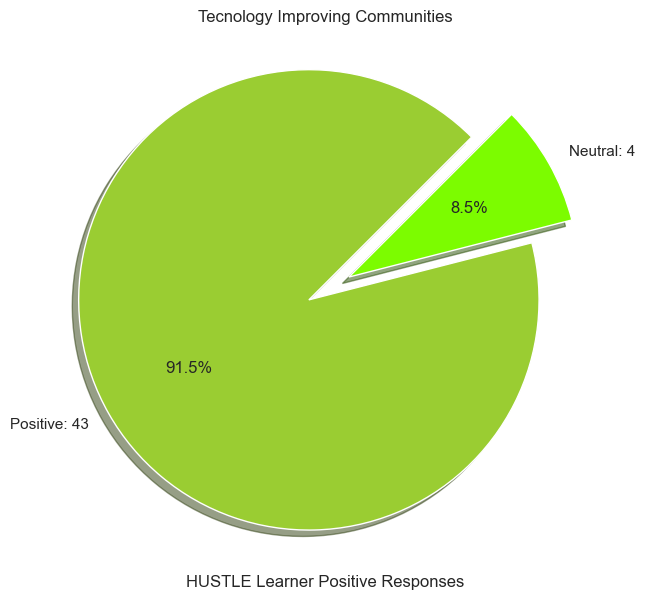

In [76]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(hustle_totals["pos"]), 'Neutral: {}'.format(hustle_totals["pos_with_n"] - hustle_totals["pos"])]

# creating percantages from data for visuals
per = (hustle_totals["pos"] / hustle_totals["valid"]) * 100
per_2 = ((hustle_totals["pos_with_n"] - hustle_totals["pos"])/ hustle_totals["valid"]) * 100

size_of_groups = [per, per_2]
explode = (0.1, 0.1)  # this creates space between slices of the pie

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["yellowgreen", "lawngreen"], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("HUSTLE Learner Positive Responses")
plt.title("Tecnology Improving Communities")
# plt.savefig('images/h_sjcomm_pie.png')
plt.show()

<b>There was a total of 47 responses given from HUSTLE learners. Of those responses, All responses were positive including neutral responses. 43 (91.5%) were positive not including neutral responses.</b>

<img src="images/b_sjcomm.png" height=100% width=100%>

In [77]:
build = multi_response(post_build, ["SJ & Community_1"])

build_totals = total_multi(build)

build, build_totals

({'SJ & Community_1': {'valid': 29,
   'di': 0,
   'sd': 0,
   'n': 0,
   'sa': 7,
   'ag': 22}},
 {'valid': 29, 'pos': 29, 'pos_with_n': 29})

<b>As you can see from the above visual there are no neutral or negative BUILD responses to this question. So there will be no pie chart following.

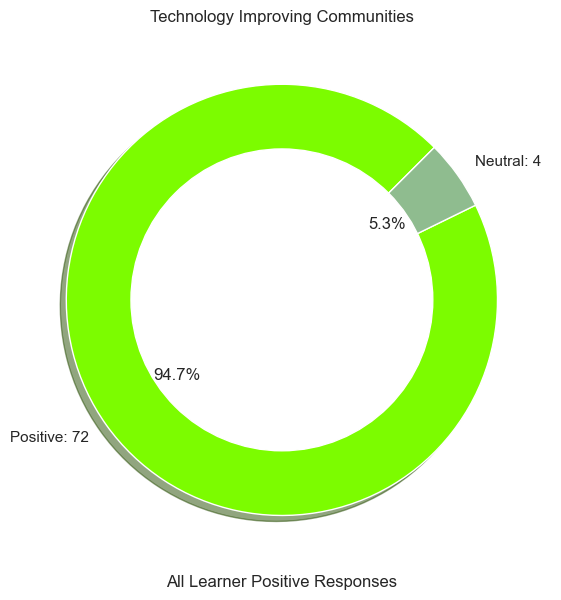

In [78]:
# create data

labels = ['Positive: {}'.format(build_totals["pos"] + hustle_totals["pos"]), 'Neutral: {}'.format((build_totals["pos_with_n"] + hustle_totals["pos_with_n"])-(build_totals["pos"] + hustle_totals["pos"]))]

per = ((build_totals["pos"] + hustle_totals["pos"]) / (build_totals["valid"] + hustle_totals["valid"])) * 100
per_2 = (((build_totals["pos_with_n"] + hustle_totals["pos_with_n"])-(build_totals["pos"] + hustle_totals["pos"])) / (build_totals["valid"] + hustle_totals["valid"])) * 100

size_of_groups = [per, per_2]

# Create a pieplot
plt.pie(size_of_groups, colors=["lawngreen", "darkseagreen"], labels = labels, autopct='%1.1f%%', shadow=True, startangle=45)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.xlabel("All Learner Positive Responses")
plt.title("Technology Improving Communities")
# plt.savefig('images/sjcomm_donut.png')
plt.show()

<b>Overall, there was a total of 76 responses given from all learners. All were positive including neutral responses and 72 (94.7%) were positive not including neutral responses. </b>

<figure>
  <figcaption><h3>HUSTLE Responses</h3></figcaption>
  <img src="images/h_sjcomm_table.png" height=100% width=100%>
</figure>

<figure>
  <figcaption><h3>BUILD Responses</h3></figcaption>
  <img src="images/b_sjcomm_table.png" height=100% width=100%>
</figure>

<hr style="border:2px solid black">

<b>Next is the evaluation of learners’ responses to inquiries about their sense of community and belonging while participating in our programs.</b> These questions are marked as <b>Community_1, Community_2,</b> and <b>Community_3</b> in the dataframe column names. Learners had five choices to choose from for this question: <b>Strongly Disagree, Somewhat Disagree, Neutral, Somewhat Agree,</b> and <b>Strongly Agree.</b>

<img src="images/h_belong.png" height=100% width=100%>

In [79]:
hustle = multi_response(post_hustle, ["Community_1", "Community_2", "Community_3"])

hustle_totals = total_multi(hustle)

hustle, hustle_totals

({'Community_1': {'valid': 47, 'di': 1, 'sd': 0, 'n': 7, 'sa': 12, 'ag': 27},
  'Community_2': {'valid': 47, 'di': 1, 'sd': 0, 'n': 6, 'sa': 8, 'ag': 32},
  'Community_3': {'valid': 47, 'di': 1, 'sd': 0, 'n': 3, 'sa': 6, 'ag': 37}},
 {'valid': 141, 'pos': 122, 'pos_with_n': 138})

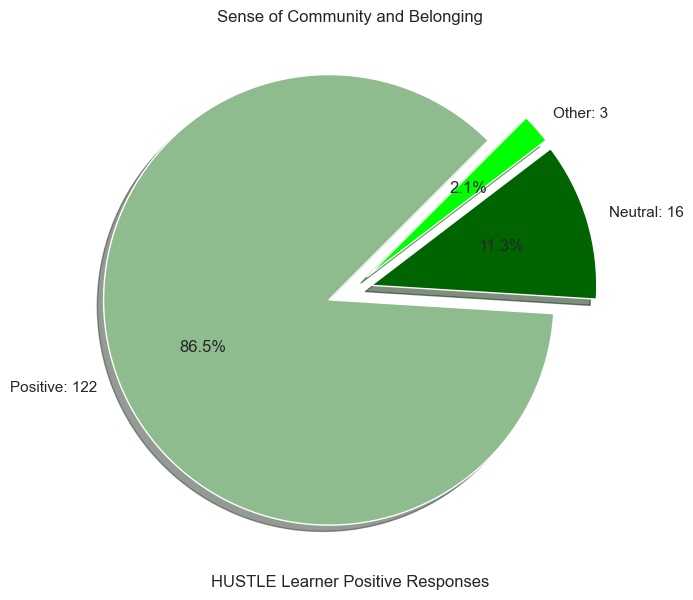

In [80]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(hustle_totals["pos"]), 'Neutral: {}'.format(hustle_totals["pos_with_n"] - hustle_totals["pos"]), 'Other: {}'.format(hustle_totals["valid"] - hustle_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (hustle_totals["pos"] / hustle_totals["valid"]) * 100
per_2 = ((hustle_totals["pos_with_n"] - hustle_totals["pos"])/ hustle_totals["valid"]) * 100
per_3 = ((hustle_totals["valid"] - hustle_totals["pos_with_n"])/ hustle_totals["valid"]) * 100

size_of_groups = [per, per_2, per_3]
explode = (0.1, 0.1, 0.1)  # this creates space between slices of the pie

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["darkseagreen", "darkgreen", "lime" ], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("HUSTLE Learner Positive Responses")
plt.title("Sense of Community and Belonging")
# plt.savefig('images/h_belong_pie.png')
plt.show()

<b>There was a total of 141 responses given from HUSTLE learners. Of those responses, 138 responses (97.8%) were positive including neutral responses. 122 (86.5%) were positive not including neutral responses.</b>

<img src="images/b_belong.png" height=100% width=100%>

In [81]:
build = multi_response(post_build, ["Community_1", "Community_2", "Community_3"])

build_totals = total_multi(build)

build, build_totals

({'Community_1': {'valid': 29, 'di': 0, 'sd': 0, 'n': 8, 'sa': 11, 'ag': 10},
  'Community_2': {'valid': 29, 'di': 0, 'sd': 0, 'n': 2, 'sa': 12, 'ag': 15},
  'Community_3': {'valid': 29, 'di': 0, 'sd': 0, 'n': 3, 'sa': 7, 'ag': 19}},
 {'valid': 87, 'pos': 74, 'pos_with_n': 87})

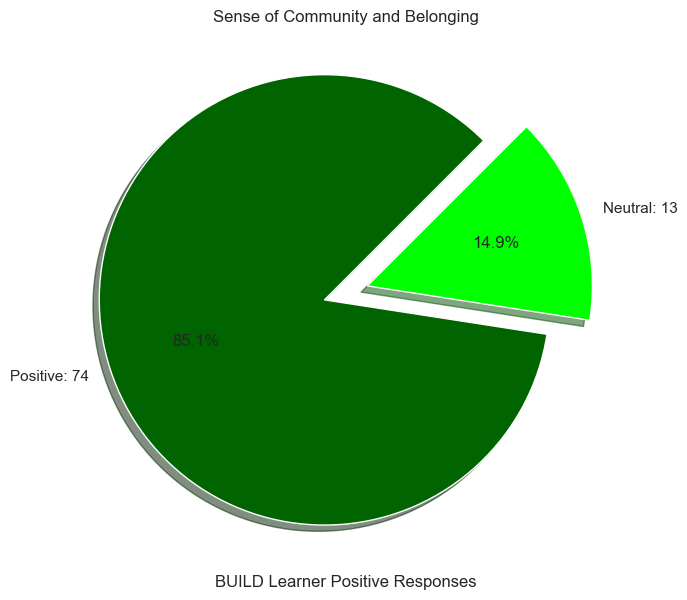

In [82]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(build_totals["pos"]), 'Neutral: {}'.format(build_totals["pos_with_n"] - build_totals["pos"])]

# creating percantages from data for visuals
per = (build_totals["pos"] / build_totals["valid"]) * 100
per_2 = ((build_totals["pos_with_n"] - build_totals["pos"])/ build_totals["valid"]) * 100

size_of_groups = [per, per_2]
explode = (0.1, 0.1)  # this creates space between slices of the pie

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["darkgreen", "lime"], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("BUILD Learner Positive Responses")
plt.title("Sense of Community and Belonging")
# plt.savefig('images/b_belong_pie.png')
plt.show()

<b>There was a total of 87 responses given from BUILD learners. Of those responses, All were positive including neutral responses and 74 (85.1%) were positive not including neutral responses. 

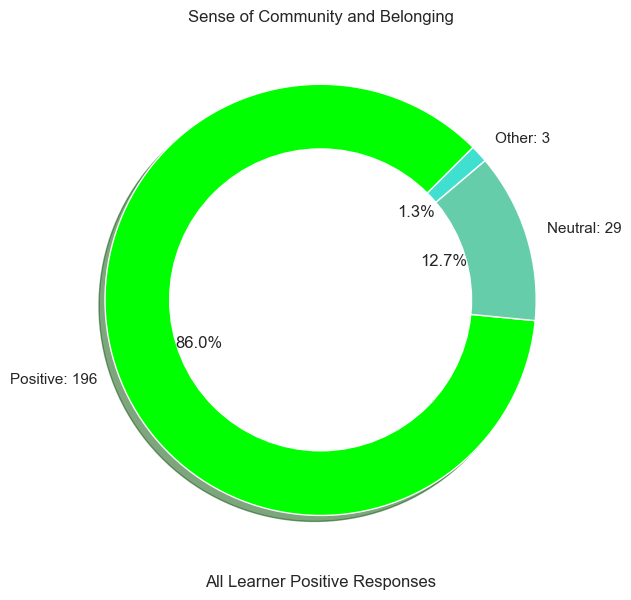

In [83]:
# create data

labels = ['Positive: {}'.format(build_totals["pos"] + hustle_totals["pos"]), 'Neutral: {}'.format((build_totals["pos_with_n"] + hustle_totals["pos_with_n"])-(build_totals["pos"] + hustle_totals["pos"])), 'Other: {}'.format((build_totals["valid"] + hustle_totals["valid"])-(build_totals["pos_with_n"] + hustle_totals["pos_with_n"]))]

per = ((build_totals["pos"] + hustle_totals["pos"]) / (build_totals["valid"] + hustle_totals["valid"])) * 100
per_2 = (((build_totals["pos_with_n"] + hustle_totals["pos_with_n"])-(build_totals["pos"] + hustle_totals["pos"])) / (build_totals["valid"] + hustle_totals["valid"])) * 100
per_3 = 100 - per - per_2

size_of_groups = [per, per_2, per_3]

# Create a pieplot
plt.pie(size_of_groups, colors=["lime", "mediumaquamarine", "turquoise"], labels = labels, autopct='%1.1f%%', shadow=True, startangle=45)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.xlabel("All Learner Positive Responses")
plt.title("Sense of Community and Belonging")
# plt.savefig('images/belong_donut.png')
plt.show()

<b>Overall, there was a total of 228 responses given from all learners. Of those responses, 225 (98.7%) were positive including neutral responses and 196 (86%) were positive not including neutral responses. </b>
    
# I felt comfortable participating in class discussions during lecture, pair programming, and office hours.

In [84]:
get_responses(post_hustle, "Community_1")

{'valid': 47, 'di': 1, 'sd': 0, 'n': 7, 'sa': 12, 'ag': 27}

<figure>
  <figcaption><h3>HUSTLE Responses</h3></figcaption>
  <img src="images/h_comm1_table.png" height=100% width=100%>
</figure>

In [85]:
get_responses(post_build, "Community_1")

{'valid': 29, 'di': 0, 'sd': 0, 'n': 8, 'sa': 11, 'ag': 10}

<figure>
  <figcaption><h3>BUILD Responses</h3></figcaption>
  <img src="images/b_comm1_table.png" height=100% width=100%>
</figure>

# My TA provided helpful feedback on my code in pair programming or office hours.

In [86]:
get_responses(post_hustle, "Community_2")

{'valid': 47, 'di': 1, 'sd': 0, 'n': 6, 'sa': 8, 'ag': 32}

<figure>
  <figcaption><h3>HUSTLE Responses</h3></figcaption>
  <img src="images/h_comm2_table.png" height=100% width=100%>
</figure>

In [87]:
get_responses(post_build, "Community_2")

{'valid': 29, 'di': 0, 'sd': 0, 'n': 2, 'sa': 12, 'ag': 15}

<figure>
  <figcaption><h3>BUILD Responses</h3></figcaption>
  <img src="images/b_comm2_table.png" height=100% width=100%>
</figure>

# My TA encouraged me to keep trying my best in coding or applying myself as a learner in general.

In [88]:
get_responses(post_hustle, "Community_3")

{'valid': 47, 'di': 1, 'sd': 0, 'n': 3, 'sa': 6, 'ag': 37}

<figure>
  <figcaption><h3>HUSTLE Responses</h3></figcaption>
  <img src="images/h_comm3_table.png" height=100% width=100%>
</figure>

In [89]:
get_responses(post_build, "Community_3")

{'valid': 29, 'di': 0, 'sd': 0, 'n': 3, 'sa': 7, 'ag': 19}

<figure>
  <figcaption><h3>BUILD Responses</h3></figcaption>
  <img src="images/b_comm3_table.png" height=100% width=100%>
</figure>

<hr style="border:2px solid black">

<b>Next is the evaluation of learners’ responses to inquiries about the effectiveness of the support system Hack the Hood provides.</b> These questions are marked as <b>TA_1, TA_2, TA_3</b> and <b>TA_4</b> in the dataframe column names.<b> Learners had five choices to choose from for this question: <b>Strongly Disagree, Somewhat Disagree, Neutral, Somewhat Agree,<b> and <b>Strongly Agree.</b>
    
<img src="images/h_support.png" height=100% width=100%>

In [90]:
hustle = multi_response(post_hustle, ["TA_1", "TA_2", "TA_3","TA_4"])

hustle_totals = total_multi(hustle)

hustle, hustle_totals

({'TA_1': {'valid': 47, 'di': 0, 'sd': 4, 'n': 8, 'sa': 16, 'ag': 19},
  'TA_2': {'valid': 47, 'di': 1, 'sd': 0, 'n': 2, 'sa': 7, 'ag': 37},
  'TA_3': {'valid': 47, 'di': 1, 'sd': 0, 'n': 3, 'sa': 5, 'ag': 38},
  'TA_4': {'valid': 47, 'di': 1, 'sd': 2, 'n': 12, 'sa': 6, 'ag': 26}},
 {'valid': 188, 'pos': 154, 'pos_with_n': 179})

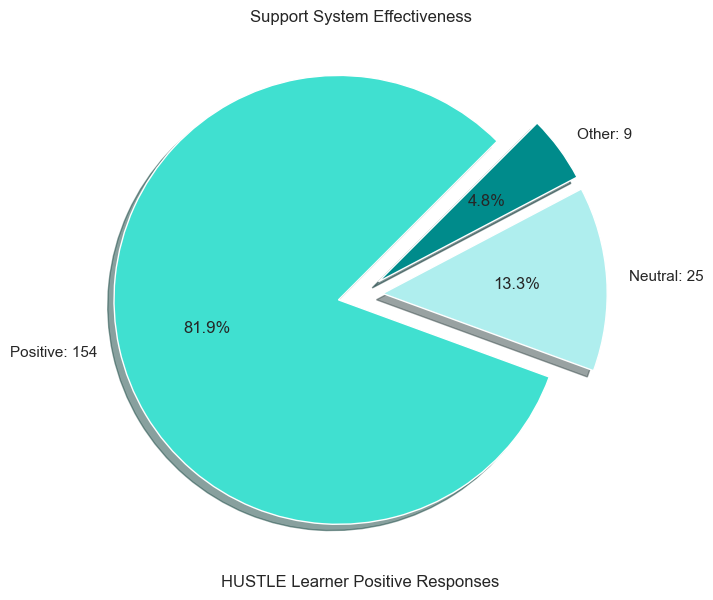

In [91]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(hustle_totals["pos"]), 'Neutral: {}'.format(hustle_totals["pos_with_n"] - hustle_totals["pos"]), 'Other: {}'.format(hustle_totals["valid"] - hustle_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (hustle_totals["pos"] / hustle_totals["valid"]) * 100
per_2 = ((hustle_totals["pos_with_n"] - hustle_totals["pos"])/ hustle_totals["valid"]) * 100
per_3 = ((hustle_totals["valid"] - hustle_totals["pos_with_n"])/ hustle_totals["valid"]) * 100

size_of_groups = [per, per_2, per_3]
explode = (0.1, 0.1, 0.1)  # this creates space between slices of the pie

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["turquoise", "paleturquoise", "darkcyan" ], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("HUSTLE Learner Positive Responses")
plt.title("Support System Effectiveness")
# plt.savefig('images/h_support_pie.png')
plt.show()

<b>There was a total of 188 responses given from HUSTLE learners. Of those responses, 179 responses (95.2%) were positive including neutral responses. 154 (81.9%) were positive not including neutral responses.</b>

<img src="images/b_support.png" height=100% width=100%>

In [92]:
build = multi_response(post_build, ["TA_1", "TA_2", "TA_3","TA_4"])

build_totals = total_multi(build)

build, build_totals

({'TA_1': {'valid': 29, 'di': 1, 'sd': 3, 'n': 5, 'sa': 16, 'ag': 4},
  'TA_2': {'valid': 29, 'di': 0, 'sd': 0, 'n': 1, 'sa': 11, 'ag': 17},
  'TA_3': {'valid': 29, 'di': 0, 'sd': 0, 'n': 1, 'sa': 8, 'ag': 20},
  'TA_4': {'valid': 29, 'di': 0, 'sd': 3, 'n': 6, 'sa': 8, 'ag': 12}},
 {'valid': 116, 'pos': 96, 'pos_with_n': 109})

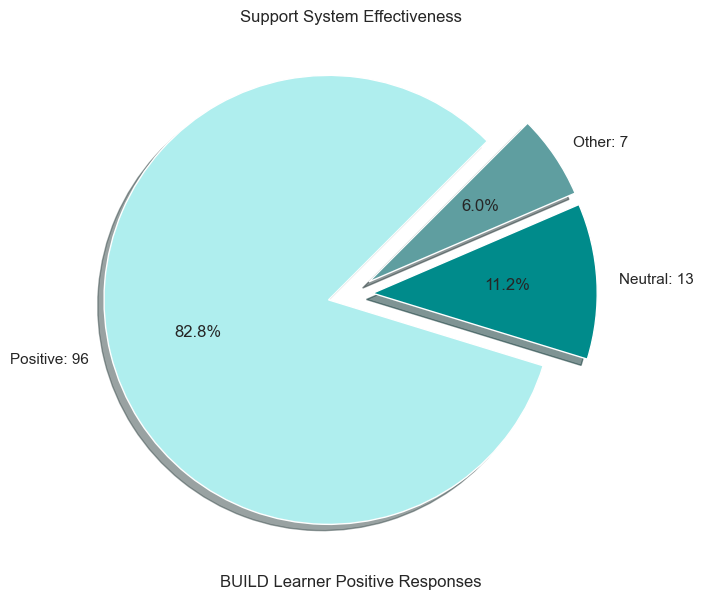

In [93]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(build_totals["pos"]), 'Neutral: {}'.format(build_totals["pos_with_n"] - build_totals["pos"]), 'Other: {}'.format(build_totals["valid"] - build_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (build_totals["pos"] / build_totals["valid"]) * 100
per_2 = ((build_totals["pos_with_n"] - build_totals["pos"])/ build_totals["valid"]) * 100
per_3 = ((build_totals["valid"] - build_totals["pos_with_n"])/ build_totals["valid"]) * 100

size_of_groups = [per, per_2, per_3]
explode = (0.1, 0.1, 0.1)  # this creates space between slices of the pie

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["paleturquoise", "darkcyan", "cadetblue"], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("BUILD Learner Positive Responses")
plt.title("Support System Effectiveness")
# plt.savefig('images/b_support_pie.png')
plt.show()

<b>There was a total of 116 responses given from BUILD learners. Of those responses, 109 were positive including neutral responses and 96 (82.8%) were positive not including neutral responses.

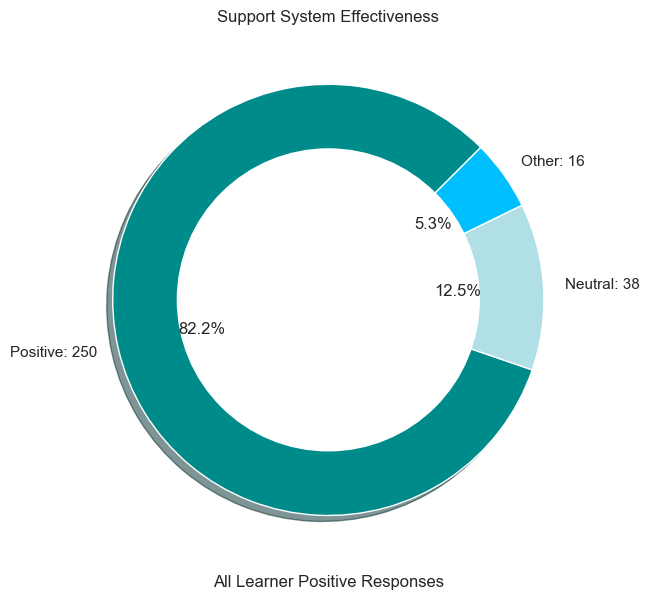

In [94]:
# create data

labels = ['Positive: {}'.format(build_totals["pos"] + hustle_totals["pos"]), 'Neutral: {}'.format((build_totals["pos_with_n"] + hustle_totals["pos_with_n"])-(build_totals["pos"] + hustle_totals["pos"])), 'Other: {}'.format((build_totals["valid"] + hustle_totals["valid"])-(build_totals["pos_with_n"] + hustle_totals["pos_with_n"]))]

per = ((build_totals["pos"] + hustle_totals["pos"]) / (build_totals["valid"] + hustle_totals["valid"])) * 100
per_2 = (((build_totals["pos_with_n"] + hustle_totals["pos_with_n"])-(build_totals["pos"] + hustle_totals["pos"])) / (build_totals["valid"] + hustle_totals["valid"])) * 100
per_3 = 100 - per - per_2

size_of_groups = [per, per_2, per_3]

# Create a pieplot
plt.pie(size_of_groups, colors=["darkcyan", "powderblue", "deepskyblue"], labels = labels, autopct='%1.1f%%', shadow=True, startangle=45)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.xlabel("All Learner Positive Responses")
plt.title("Support System Effectiveness")
# plt.savefig('images/support_donut.png')
plt.show()

<b>Overall, there was a total of 304 responses given from all learners. Of those responses, 288 (94.7%) were positive including neutral responses and 250 (82.2%) were positive not including neutral responses. </b>
    
# I built relationships with other participants in my program.

In [95]:
get_responses(post_hustle, "TA_1")

{'valid': 47, 'di': 0, 'sd': 4, 'n': 8, 'sa': 16, 'ag': 19}

<figure>
  <figcaption><h3>HUSTLE Responses</h3></figcaption>
  <img src="images/h_ta1_table.png" height=100% width=100%>
</figure>

In [96]:
get_responses(post_build, "TA_1")

{'valid': 29, 'di': 1, 'sd': 3, 'n': 5, 'sa': 16, 'ag': 4}

<figure>
  <figcaption><h3>BUILD Responses</h3></figcaption>
  <img src="images/b_ta1_table.png" height=100% width=100%>
</figure>

# I feel the Hack the Hood staff members support my success.

In [97]:
get_responses(post_hustle, "TA_2")

{'valid': 47, 'di': 1, 'sd': 0, 'n': 2, 'sa': 7, 'ag': 37}

<figure>
  <figcaption><h3>HUSTLE Responses</h3></figcaption>
  <img src="images/h_ta2_table.png" height=100% width=100%>
</figure>

In [98]:
get_responses(post_build, "TA_2")

{'valid': 29, 'di': 0, 'sd': 0, 'n': 1, 'sa': 11, 'ag': 17}

<figure>
  <figcaption><h3>BUILD Responses</h3></figcaption>
  <img src="images/b_ta2_table.png" height=100% width=100%>
</figure>

# The volunteers and panelists provided good advice and information during the program.

In [99]:
get_responses(post_hustle, "TA_3")

{'valid': 47, 'di': 1, 'sd': 0, 'n': 3, 'sa': 5, 'ag': 38}

<figure>
  <figcaption><h3>HUSTLE Responses</h3></figcaption>
  <img src="images/h_ta3_table.png" height=100% width=100%>
</figure>

In [100]:
get_responses(post_build, "TA_3")

{'valid': 29, 'di': 0, 'sd': 0, 'n': 1, 'sa': 8, 'ag': 20}

<figure>
  <figcaption><h3>BUILD Responses</h3></figcaption>
  <img src="images/b_ta3_table.png" height=100% width=100%>
</figure>

# I had a chance to meet a mentor or role model in technology (staff, guest panelists, or alumni) during this program.

In [101]:
get_responses(post_hustle, "TA_4")

{'valid': 47, 'di': 1, 'sd': 2, 'n': 12, 'sa': 6, 'ag': 26}

<figure>
  <figcaption><h3>HUSTLE Responses</h3></figcaption>
  <img src="images/h_ta4_table.png" height=100% width=100%>
</figure>

In [102]:
get_responses(post_build, "TA_4")

{'valid': 29, 'di': 0, 'sd': 3, 'n': 6, 'sa': 8, 'ag': 12}

<figure>
  <figcaption><h3>BUILD Responses</h3></figcaption>
  <img src="images/b_ta4_table.png" height=100% width=100%>
</figure>

<hr style="border:2px solid black">

<b>Next is the evaluation of learners’ responses to inquiries about them developing their careers and achieving their goals during the program.</b> These questions are marked as <b>Career Opportunities_1, Career Opportunities_2,</b> and <b>Career Opportunities_3</b> in the dataframe column names.<b> Learners had five choices to choose from for this question: <b>Strongly Disagree, Somewhat Disagree, Neutral, Somewhat Agree,<b> and <b>Strongly Agree.</b>
    
<img src="images/h_dev.png" height=100% width=100%>

In [103]:
hustle = multi_response(post_hustle, ["Career Opportunities_1", "Career Opportunities_2", "Career Opportunities_3"])

hustle_totals = total_multi(hustle)

hustle, hustle_totals

({'Career Opportunities_1': {'valid': 47,
   'di': 1,
   'sd': 2,
   'n': 3,
   'sa': 12,
   'ag': 29},
  'Career Opportunities_2': {'valid': 47,
   'di': 0,
   'sd': 2,
   'n': 3,
   'sa': 17,
   'ag': 25},
  'Career Opportunities_3': {'valid': 47,
   'di': 1,
   'sd': 1,
   'n': 5,
   'sa': 10,
   'ag': 30}},
 {'valid': 141, 'pos': 123, 'pos_with_n': 134})

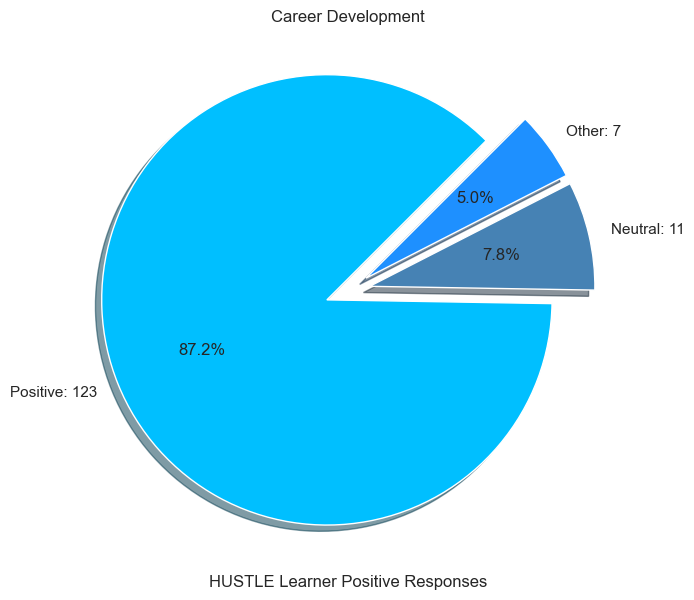

In [104]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(hustle_totals["pos"]), 'Neutral: {}'.format(hustle_totals["pos_with_n"] - hustle_totals["pos"]), 'Other: {}'.format(hustle_totals["valid"] - hustle_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (hustle_totals["pos"] / hustle_totals["valid"]) * 100
per_2 = ((hustle_totals["pos_with_n"] - hustle_totals["pos"])/ hustle_totals["valid"]) * 100
per_3 = ((hustle_totals["valid"] - hustle_totals["pos_with_n"])/ hustle_totals["valid"]) * 100

size_of_groups = [per, per_2, per_3]
explode = (0.1, 0.1, 0.1)  # this creates space between slices of the pie

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["deepskyblue", "steelblue", "dodgerblue" ], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("HUSTLE Learner Positive Responses")
plt.title("Career Development")
# plt.savefig('images/h_dev_pie.png')
plt.show()

<b>There was a total of 141 responses given from HUSTLE learners. Of those responses, 134 responses (95%) were positive including neutral responses. 123 (87.2%) were positive not including neutral responses.</b>

<img src="images/b_dev.png" height=100% width=100%>

In [105]:
build = multi_response(post_build, ["Career Opportunities_1", "Career Opportunities_2", "Career Opportunities_3"])

build_totals = total_multi(build)

build, build_totals

({'Career Opportunities_1': {'valid': 29,
   'di': 0,
   'sd': 0,
   'n': 3,
   'sa': 9,
   'ag': 17},
  'Career Opportunities_2': {'valid': 29,
   'di': 0,
   'sd': 0,
   'n': 4,
   'sa': 16,
   'ag': 9},
  'Career Opportunities_3': {'valid': 29,
   'di': 0,
   'sd': 2,
   'n': 2,
   'sa': 9,
   'ag': 16}},
 {'valid': 87, 'pos': 76, 'pos_with_n': 85})

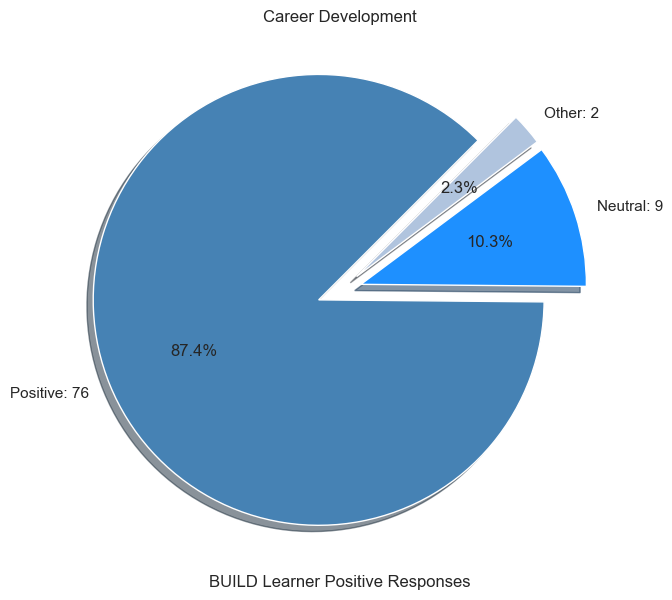

In [106]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(build_totals["pos"]), 'Neutral: {}'.format(build_totals["pos_with_n"] - build_totals["pos"]), 'Other: {}'.format(build_totals["valid"] - build_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (build_totals["pos"] / build_totals["valid"]) * 100
per_2 = ((build_totals["pos_with_n"] - build_totals["pos"])/ build_totals["valid"]) * 100
per_3 = ((build_totals["valid"] - build_totals["pos_with_n"])/ build_totals["valid"]) * 100

size_of_groups = [per, per_2, per_3]
explode = (0.1, 0.1, 0.1)  # this creates space between slices of the pie

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["steelblue", "dodgerblue", "lightsteelblue"], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("BUILD Learner Positive Responses")
plt.title("Career Development")
# plt.savefig('images/b_dev_pie.png')
plt.show()

<b>There was a total of 87 responses given from BUILD learners. Of those responses, 85 ( were positive including neutral responses and 76 (87.4%) were positive not including neutral responses.

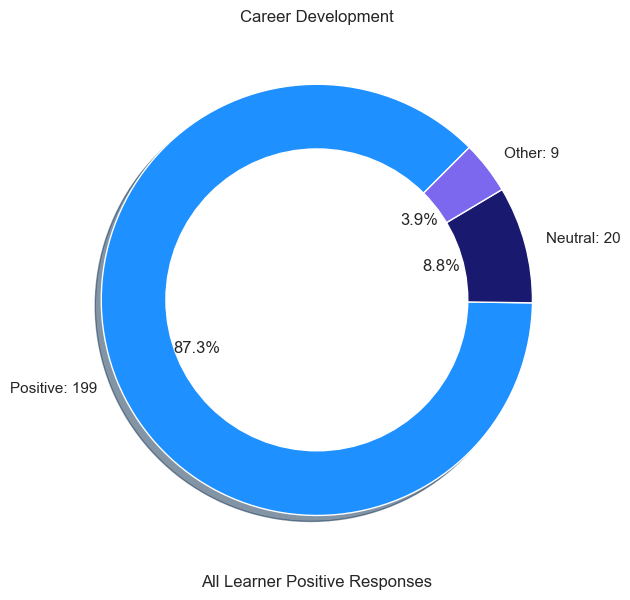

In [107]:
# create data

labels = ['Positive: {}'.format(build_totals["pos"] + hustle_totals["pos"]), 'Neutral: {}'.format((build_totals["pos_with_n"] + hustle_totals["pos_with_n"])-(build_totals["pos"] + hustle_totals["pos"])), 'Other: {}'.format((build_totals["valid"] + hustle_totals["valid"])-(build_totals["pos_with_n"] + hustle_totals["pos_with_n"]))]

per = ((build_totals["pos"] + hustle_totals["pos"]) / (build_totals["valid"] + hustle_totals["valid"])) * 100
per_2 = (((build_totals["pos_with_n"] + hustle_totals["pos_with_n"])-(build_totals["pos"] + hustle_totals["pos"])) / (build_totals["valid"] + hustle_totals["valid"])) * 100
per_3 = 100 - per - per_2

size_of_groups = [per, per_2, per_3]

# Create a pieplot
plt.pie(size_of_groups, colors=["dodgerblue", "midnightblue", "mediumslateblue"], labels = labels, autopct='%1.1f%%', shadow=True, startangle=45)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.xlabel("All Learner Positive Responses")
plt.title("Career Development")
# plt.savefig('images/dev_donut.png')
plt.show()

<b>Overall, there was a total of 228 responses given from all learners. Of those responses, 219 (96.1%) were positive including neutral responses and 199 (87.3%) were positive not including neutral responses. </b>
    
# I know about different positions and career options in technology.

In [108]:
get_responses(post_hustle, "Career Opportunities_1")

{'valid': 47, 'di': 1, 'sd': 2, 'n': 3, 'sa': 12, 'ag': 29}

<figure>
  <figcaption><h3>HUSTLE Responses</h3></figcaption>
  <img src="images/h_car1_table.png" height=100% width=100%>
</figure>

In [109]:
get_responses(post_build, "Career Opportunities_1")

{'valid': 29, 'di': 0, 'sd': 0, 'n': 3, 'sa': 9, 'ag': 17}

<figure>
  <figcaption><h3>BUILD Responses</h3></figcaption>
  <img src="images/b_car1_table.png" height=100% width=100%>
</figure>

# I know what steps I need to take in order to pursue a career in technology.

In [110]:
get_responses(post_hustle, "Career Opportunities_2")

{'valid': 47, 'di': 0, 'sd': 2, 'n': 3, 'sa': 17, 'ag': 25}

<figure>
  <figcaption><h3>HUSTLE Responses</h3></figcaption>
  <img src="images/h_car2_table.png" height=100% width=100%>
</figure>

In [111]:
get_responses(post_build, "Career Opportunities_2")

{'valid': 29, 'di': 0, 'sd': 0, 'n': 4, 'sa': 16, 'ag': 9}

<figure>
  <figcaption><h3>BUILD Responses</h3></figcaption>
  <img src="images/b_car2_table.png" height=100% width=100%>
</figure>

# I was able to achieve one of my goals in this program.

In [112]:
get_responses(post_hustle, "Career Opportunities_3")

{'valid': 47, 'di': 1, 'sd': 1, 'n': 5, 'sa': 10, 'ag': 30}

<figure>
  <figcaption><h3>HUSTLE Responses</h3></figcaption>
  <img src="images/h_car3_table.png" height=100% width=100%>
</figure>

In [113]:
get_responses(post_build, "Career Opportunities_3")

{'valid': 29, 'di': 0, 'sd': 2, 'n': 2, 'sa': 9, 'ag': 16}

<figure>
  <figcaption><h3>BUILD Responses</h3></figcaption>
  <img src="images/b_car3_table.png" height=100% width=100%>
</figure>

<hr style="border:2px solid black">

<b>Finally, we will be examining the learners responses to our inquiries about their intersectional tech identities</b> (how much they feel they belong in the tech space and have access to resources to be successful). The questions that we are looking at are marked as <b>Q30, Gee_1, Gee_2, Gee_3, McAlpine_1, McAlpine_2, McAlpine_3, McAlpine_4,</b> and <b>McAlpine_5</b> in the dataframe column names. For the first question, learners chose any applicable activities they planned to pursue after Hack the Hood, choosing from <b>Career in technology (or in the tech industry in general), Technology- or software-related certification, Tech bootcamp, Associate's degree, Bachelor's degree, and Beyond bachelor's degree (such as master's, Ph.D, or other graduate-level)</b>. Then, learners had five choices to choose from as their response for the remaining questions: <b>Strongly Disagree, Somewhat Disagree, Neutral, Somewhat Agree, and Strongly Agree.</b>

<img src="images/h_id1.png" height=100% width=100%>
<img src="images/h_id2.png" height=100% width=100%>

In [114]:
hustle = multi_response(post_hustle, ["Gee_1", "Gee_2", "Gee_3", "McAlpine_1", "McAlpine_2", "McAlpine_3", "McAlpine_4", "McAlpine_5"])

hustle_totals = total_multi(hustle)

hustle, hustle_totals

({'Gee_1': {'valid': 46, 'di': 0, 'sd': 1, 'n': 9, 'sa': 20, 'ag': 16},
  'Gee_2': {'valid': 46, 'di': 0, 'sd': 0, 'n': 5, 'sa': 25, 'ag': 16},
  'Gee_3': {'valid': 46, 'di': 0, 'sd': 0, 'n': 9, 'sa': 14, 'ag': 23},
  'McAlpine_1': {'valid': 46, 'di': 0, 'sd': 0, 'n': 7, 'sa': 18, 'ag': 21},
  'McAlpine_2': {'valid': 46, 'di': 0, 'sd': 0, 'n': 5, 'sa': 13, 'ag': 28},
  'McAlpine_3': {'valid': 46, 'di': 1, 'sd': 1, 'n': 13, 'sa': 11, 'ag': 20},
  'McAlpine_4': {'valid': 46, 'di': 0, 'sd': 0, 'n': 6, 'sa': 15, 'ag': 25},
  'McAlpine_5': {'valid': 46, 'di': 0, 'sd': 0, 'n': 3, 'sa': 12, 'ag': 31}},
 {'valid': 368, 'pos': 308, 'pos_with_n': 365})

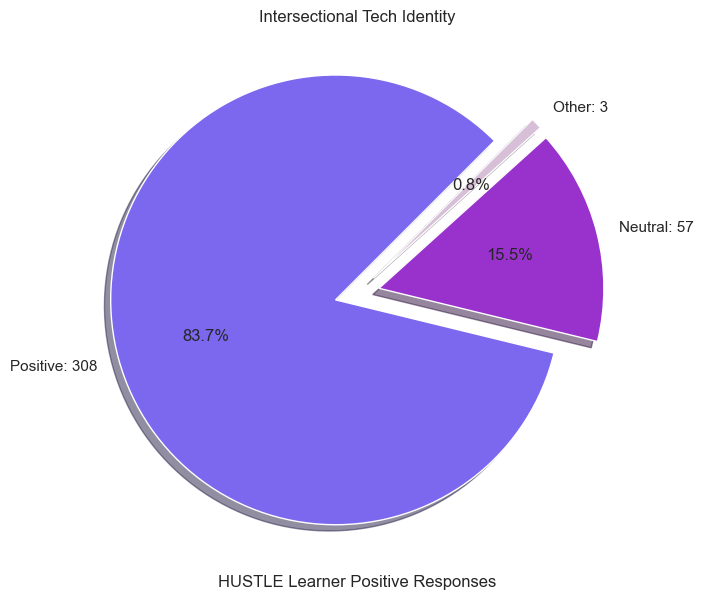

In [115]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(hustle_totals["pos"]), 'Neutral: {}'.format(hustle_totals["pos_with_n"] - hustle_totals["pos"]), 'Other: {}'.format(hustle_totals["valid"] - hustle_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (hustle_totals["pos"] / hustle_totals["valid"]) * 100
per_2 = ((hustle_totals["pos_with_n"] - hustle_totals["pos"])/ hustle_totals["valid"]) * 100
per_3 = ((hustle_totals["valid"] - hustle_totals["pos_with_n"])/ hustle_totals["valid"]) * 100

size_of_groups = [per, per_2, per_3]
explode = (0.1, 0.1, 0.1)  # this creates space between slices of the pie

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["mediumslateblue", "darkorchid", "thistle" ], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("HUSTLE Learner Positive Responses")
plt.title("Intersectional Tech Identity")
# plt.savefig('images/h_id_pie.png')
plt.show()

<b>There was a total of 368 responses given from HUSTLE learners. Of those responses, 365 responses (99.2%) were positive including neutral responses. 308 (83.7%) were positive not including neutral responses.</b>

<img src="images/b_id1.png" height=100% width=100%>
<img src="images/b_id2.png" height=100% width=100%>

In [116]:
build = multi_response(post_build, ["Gee_1", "Gee_2", "Gee_3", "McAlpine_1", "McAlpine_2", "McAlpine_3", "McAlpine_4", "McAlpine_5"])

build_totals = total_multi(build)

build, build_totals

({'Gee_1': {'valid': 27, 'di': 0, 'sd': 0, 'n': 7, 'sa': 8, 'ag': 12},
  'Gee_2': {'valid': 27, 'di': 0, 'sd': 2, 'n': 2, 'sa': 11, 'ag': 12},
  'Gee_3': {'valid': 27, 'di': 0, 'sd': 1, 'n': 9, 'sa': 6, 'ag': 11},
  'McAlpine_1': {'valid': 27, 'di': 0, 'sd': 1, 'n': 12, 'sa': 6, 'ag': 8},
  'McAlpine_2': {'valid': 27, 'di': 0, 'sd': 2, 'n': 3, 'sa': 10, 'ag': 12},
  'McAlpine_3': {'valid': 27, 'di': 0, 'sd': 4, 'n': 6, 'sa': 8, 'ag': 9},
  'McAlpine_4': {'valid': 27, 'di': 0, 'sd': 1, 'n': 3, 'sa': 6, 'ag': 17},
  'McAlpine_5': {'valid': 27, 'di': 0, 'sd': 0, 'n': 2, 'sa': 9, 'ag': 16}},
 {'valid': 216, 'pos': 161, 'pos_with_n': 205})

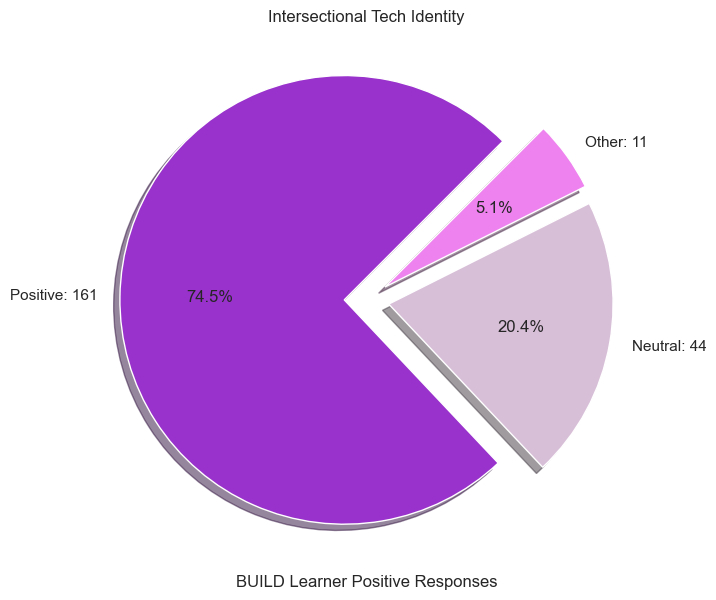

In [117]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Positive: {}'.format(build_totals["pos"]), 'Neutral: {}'.format(build_totals["pos_with_n"] - build_totals["pos"]), 'Other: {}'.format(build_totals["valid"] - build_totals["pos_with_n"])]

# creating percantages from data for visuals
per = (build_totals["pos"] / build_totals["valid"]) * 100
per_2 = ((build_totals["pos_with_n"] - build_totals["pos"])/ build_totals["valid"]) * 100
per_3 = ((build_totals["valid"] - build_totals["pos_with_n"])/ build_totals["valid"]) * 100

size_of_groups = [per, per_2, per_3]
explode = (0.1, 0.1, 0.1)  # this creates space between slices of the pie

fig1, ax1 = plt.subplots()
ax1.pie(size_of_groups, colors=["darkorchid", "thistle", "violet"], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel("BUILD Learner Positive Responses")
plt.title("Intersectional Tech Identity")
# plt.savefig('images/b_id_pie.png')
plt.show()

<b>There was a total of 216 responses given from BUILD learners. Of those responses, 205 (94.9%) were positive including neutral responses and 161 (74.5%) were positive not including neutral responses.

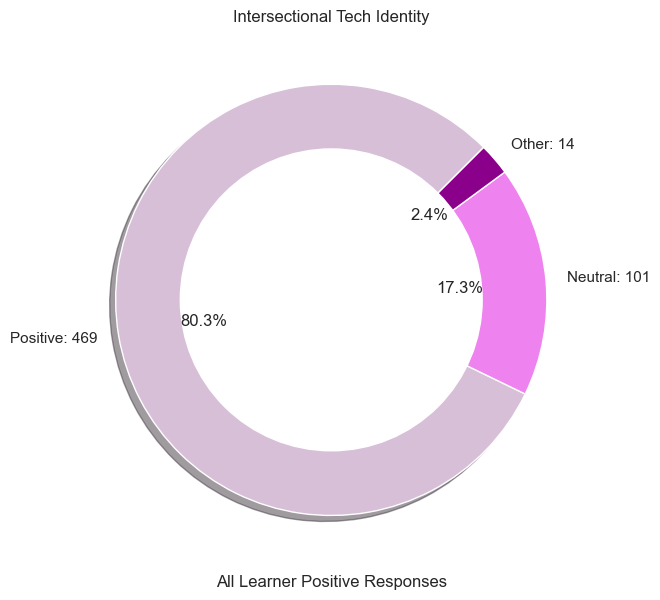

In [118]:
# create data

labels = ['Positive: {}'.format(build_totals["pos"] + hustle_totals["pos"]), 'Neutral: {}'.format((build_totals["pos_with_n"] + hustle_totals["pos_with_n"])-(build_totals["pos"] + hustle_totals["pos"])), 'Other: {}'.format((build_totals["valid"] + hustle_totals["valid"])-(build_totals["pos_with_n"] + hustle_totals["pos_with_n"]))]

per = ((build_totals["pos"] + hustle_totals["pos"]) / (build_totals["valid"] + hustle_totals["valid"])) * 100
per_2 = (((build_totals["pos_with_n"] + hustle_totals["pos_with_n"])-(build_totals["pos"] + hustle_totals["pos"])) / (build_totals["valid"] + hustle_totals["valid"])) * 100
per_3 = 100 - per - per_2

size_of_groups = [per, per_2, per_3]

# Create a pieplot
plt.pie(size_of_groups, colors=["thistle", "violet", "darkmagenta"], labels = labels, autopct='%1.1f%%', shadow=True, startangle=45)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.xlabel("All Learner Positive Responses")
plt.title("Intersectional Tech Identity")
# plt.savefig('images/id_donut.png')
plt.show()

<b>Overall, there was a total of 584 responses given from all learners. Of those responses, 570 (97.6%) were positive including neutral responses and 469 (80.3%) were positive not including neutral responses. </b>

# Which of these do you plan on pursuing or signing up for in the near future? Check all that apply.

In [119]:
Q30(post_hustle)

(47, 30, 5, 2, 0, 7, 1)

<figure>
  <figcaption><h3>HUSTLE Responses</h3></figcaption>
  <img src="images/h_future.png" height=100% width=100%>
</figure>

In [120]:
Q30(post_build)

(29, 23, 1, 2, 0, 1, 0)

<figure>
  <figcaption><h3>BUILD Responses</h3></figcaption>
  <img src="images/b_future.png" height=100% width=100%>
</figure>

# I am the type of person who will be successful in tech.

In [121]:
get_responses(post_hustle, "Gee_1")

{'valid': 46, 'di': 0, 'sd': 1, 'n': 9, 'sa': 20, 'ag': 16}

<figure>
  <figcaption><h3>HUSTLE Responses</h3></figcaption>
  <img src="images/h_id1_table.png" height=100% width=100%>
</figure>

In [122]:
get_responses(post_build, "Gee_1")

{'valid': 27, 'di': 0, 'sd': 0, 'n': 7, 'sa': 8, 'ag': 12}

<figure>
  <figcaption><h3>BUILD Responses</h3></figcaption>
  <img src="images/b_id1_table.png" height=100% width=100%>
</figure>

# Hack the Hood helped me see myself as a technical person. 

In [123]:
get_responses(post_hustle, "Gee_2")

{'valid': 46, 'di': 0, 'sd': 0, 'n': 5, 'sa': 25, 'ag': 16}

<figure>
  <figcaption><h3>HUSTLE Responses</h3></figcaption>
  <img src="images/h_id2_table.png" height=100% width=100%>
</figure>

In [124]:
get_responses(post_build, "Gee_2")

{'valid': 27, 'di': 0, 'sd': 2, 'n': 2, 'sa': 11, 'ag': 12}

<figure>
  <figcaption><h3>BUILD Responses</h3></figcaption>
  <img src="images/b_id2_table.png" height=100% width=100%>
</figure>

# My classmates are people I want to work with in the future.

In [125]:
get_responses(post_hustle, "Gee_3")

{'valid': 46, 'di': 0, 'sd': 0, 'n': 9, 'sa': 14, 'ag': 23}

<figure>
  <figcaption><h3>HUSTLE Responses</h3></figcaption>
  <img src="images/h_id3_table.png" height=100% width=100%>
</figure>

In [126]:
get_responses(post_build, "Gee_3")

{'valid': 27, 'di': 0, 'sd': 1, 'n': 9, 'sa': 6, 'ag': 11}

<figure>
  <figcaption><h3>BUILD Responses</h3></figcaption>
  <img src="images/b_id3_table.png" height=100% width=100%>
</figure>

# I was able to contribute and help in my class experience.

In [127]:
get_responses(post_hustle, "McAlpine_1")

{'valid': 46, 'di': 0, 'sd': 0, 'n': 7, 'sa': 18, 'ag': 21}

<figure>
  <figcaption><h3>HUSTLE Responses</h3></figcaption>
  <img src="images/h_id4_table.png" height=100% width=100%>
</figure>

In [128]:
get_responses(post_build, "McAlpine_1")

{'valid': 27, 'di': 0, 'sd': 1, 'n': 12, 'sa': 6, 'ag': 8}

<figure>
  <figcaption><h3>BUILD Responses</h3></figcaption>
  <img src="images/b_id4_table.png" height=100% width=100%>
</figure>

# I figured out how to get help or fix my coding challenges.

In [129]:
get_responses(post_hustle, "McAlpine_2")

{'valid': 46, 'di': 0, 'sd': 0, 'n': 5, 'sa': 13, 'ag': 28}

<figure>
  <figcaption><h3>HUSTLE Responses</h3></figcaption>
  <img src="images/h_id5_table.png" height=100% width=100%>
</figure>

In [130]:
get_responses(post_build, "McAlpine_2")

{'valid': 27, 'di': 0, 'sd': 2, 'n': 3, 'sa': 10, 'ag': 12}

<figure>
  <figcaption><h3>BUILD Responses</h3></figcaption>
  <img src="images/b_id5_table.png" height=100% width=100%>
</figure>

# I found or continued a new hobby through this program.

In [131]:
get_responses(post_hustle, "McAlpine_3")

{'valid': 46, 'di': 1, 'sd': 1, 'n': 13, 'sa': 11, 'ag': 20}

<figure>
  <figcaption><h3>HUSTLE Responses</h3></figcaption>
  <img src="images/h_id6_table.png" height=100% width=100%>
</figure>

In [132]:
get_responses(post_build, "McAlpine_3")

{'valid': 27, 'di': 0, 'sd': 4, 'n': 6, 'sa': 8, 'ag': 9}

<figure>
  <figcaption><h3>BUILD Responses</h3></figcaption>
  <img src="images/b_id6_table.png" height=100% width=100%>
</figure>

# I received resources to help me in my future.

In [133]:
get_responses(post_hustle, "McAlpine_4")

{'valid': 46, 'di': 0, 'sd': 0, 'n': 6, 'sa': 15, 'ag': 25}

<figure>
  <figcaption><h3>HUSTLE Responses</h3></figcaption>
  <img src="images/h_id7_table.png" height=100% width=100%>
</figure>

In [134]:
get_responses(post_build, "McAlpine_4")

{'valid': 27, 'di': 0, 'sd': 1, 'n': 3, 'sa': 6, 'ag': 17}

<figure>
  <figcaption><h3>BUILD Responses</h3></figcaption>
  <img src="images/b_id7_table.png" height=100% width=100%>
</figure>

# Hack the Hood provided enough resources to help me be successful in this program.

In [135]:
get_responses(post_hustle, "McAlpine_5")

{'valid': 46, 'di': 0, 'sd': 0, 'n': 3, 'sa': 12, 'ag': 31}

<figure>
  <figcaption><h3>HUSTLE Responses</h3></figcaption>
  <img src="images/h_id8_table.png" height=100% width=100%>
</figure>

In [136]:
get_responses(post_build, "McAlpine_5")

{'valid': 27, 'di': 0, 'sd': 0, 'n': 2, 'sa': 9, 'ag': 16}

<figure>
  <figcaption><h3>BUILD Responses</h3></figcaption>
  <img src="images/b_id8_table.png" height=100% width=100%>
</figure>